# TASK 1- UNSUPERVISED LEARNING

In [1]:
#dataset from "https://www.kaggle.com/datasets/kukuroo3/body-performance-data"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("bodyPerformance.csv")

## EXPLORING THE DATA

In [4]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
df = df.drop(['class'], axis=1)

In [6]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

df['gender'] = LabelEncoder().fit_transform(df['gender'])
    
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0


In [8]:
df.isna().sum().sum()

0

In [9]:
df.shape

(13393, 11)

In [10]:
df.dtypes

age                        float64
gender                       int32
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
dtype: object

In [11]:
column_names = ['age','gender','height_cm','weight_kg','body fat_%','diastolic','systolic','gripForce','sit and bend forward_cm','sit-ups counts','broad jump_cm']
numerical = ['age','height_cm','weight_kg','body fat_%','diastolic','systolic','gripForce','sit and bend forward_cm','sit-ups counts','broad jump_cm']

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height_cm'}>,
        <AxesSubplot:title={'center':'weight_kg'}>],
       [<AxesSubplot:title={'center':'body fat_%'}>,
        <AxesSubplot:title={'center':'diastolic'}>,
        <AxesSubplot:title={'center':'systolic'}>,
        <AxesSubplot:title={'center':'gripForce'}>],
       [<AxesSubplot:title={'center':'sit and bend forward_cm'}>,
        <AxesSubplot:title={'center':'sit-ups counts'}>,
        <AxesSubplot:title={'center':'broad jump_cm'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

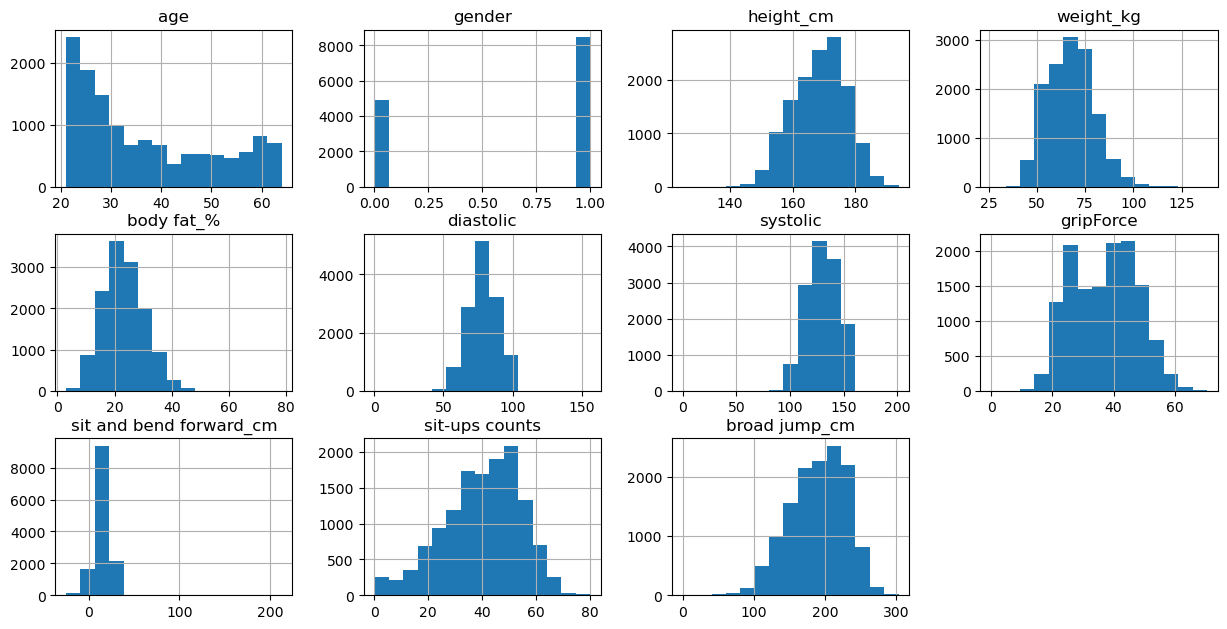

In [12]:
#numerical data distribution

df.hist(bins=15, figsize=(15, 10), layout=(4, 4))

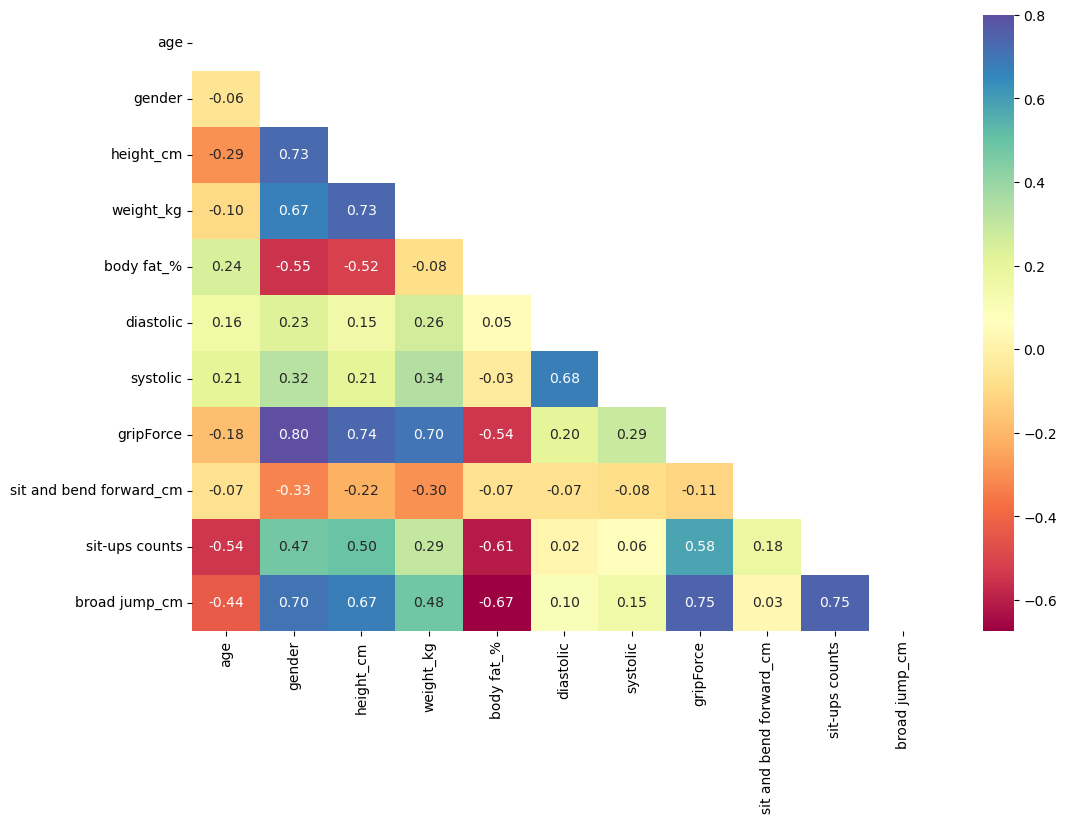

In [13]:
#checking for multi-collinearity

fig,ax = plt.subplots(figsize=(12,8))
mask = np.triu(df.corr()) 
heatmap = sns.heatmap(df.corr(), cmap= "Spectral", annot = True, fmt='.2f', mask = mask)
plt.show()

In [14]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [15]:
X = df
calc_vif(X)

,Variables,VIF
0,age,14.432352
1,gender,13.707239
2,height_cm,224.993334
3,weight_kg,125.755246
4,body fat_%,30.473184
5,diastolic,102.970247
6,systolic,159.815637
7,gripForce,59.785489
8,sit and bend forward_cm,6.392054
9,sit-ups counts,26.516374


## PCA - DIMENSION REDUCTION

In [16]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

df_scaled = std_scaler.fit_transform(df)

Text(0, 0.5, 'Cumulative explained variance')

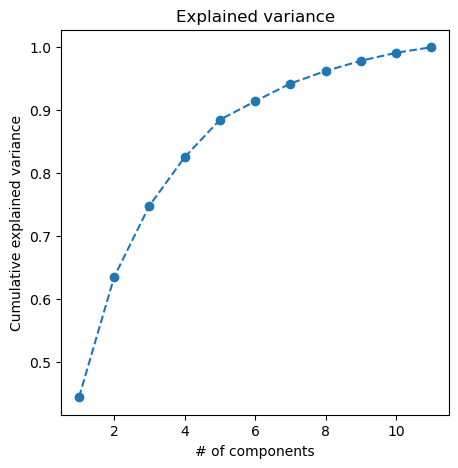

In [17]:
# explained variance plot

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(df_scaled)

plt.figure(figsize = (5, 5))
plt.plot(range(1, len(df.columns)+1), 
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--'
        )
plt.title("Explained variance")
plt.xlabel("# of components")
plt.ylabel("Cumulative explained variance")

In [18]:
#factor loadings on the first two components

pca = PCA(n_components=2)
X = pca.fit_transform(X)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=column_names)
loadings

,PC1,PC2
age,0.145949,-0.376274
gender,-0.007972,-0.008962
height_cm,-0.137671,-0.092933
weight_kg,-0.143446,-0.294284
body fat_%,0.112370,-0.053923
diastolic,-0.028850,-0.441877
systolic,-0.060047,-0.708464
gripForce,-0.189866,-0.160000
sit and bend forward_cm,-0.003279,0.109242
sit-ups counts,-0.257458,0.153414


[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


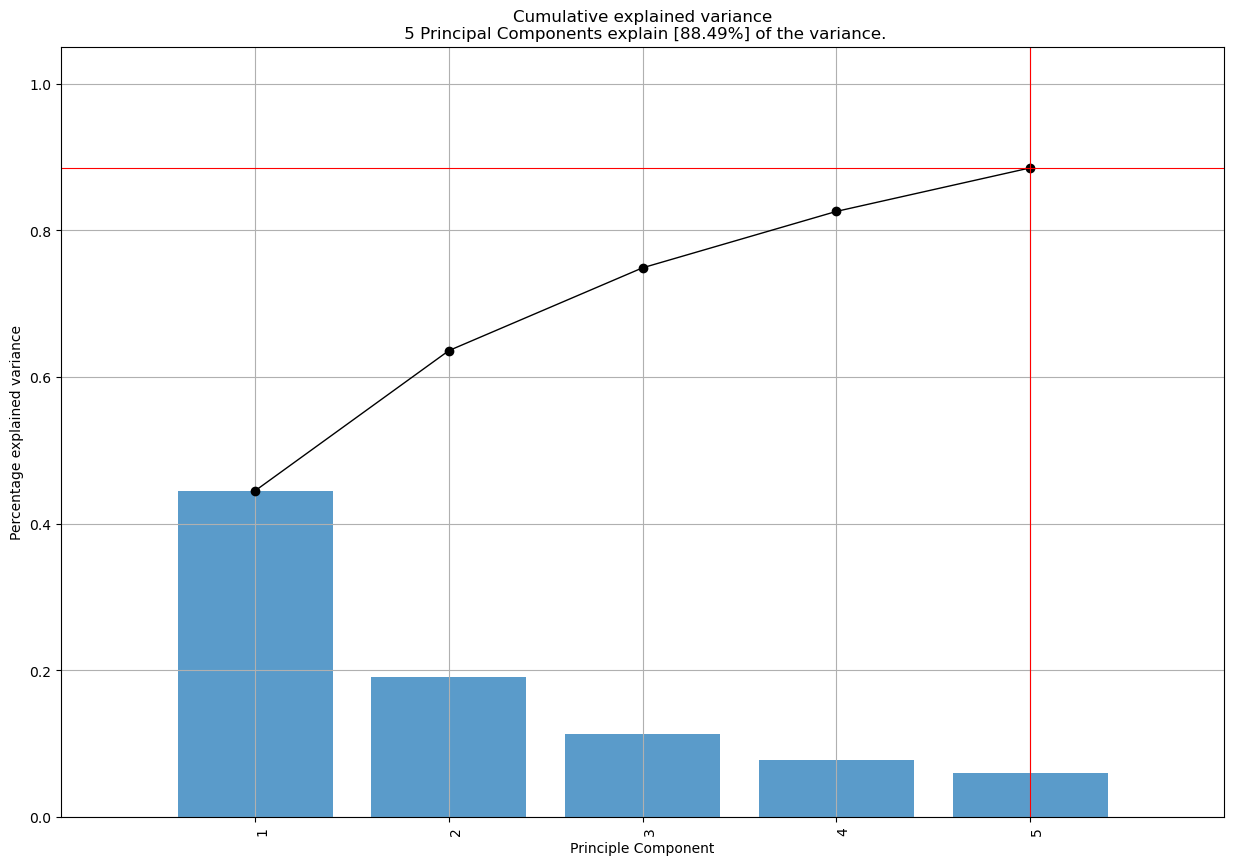

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 640x480 with 0 Axes>

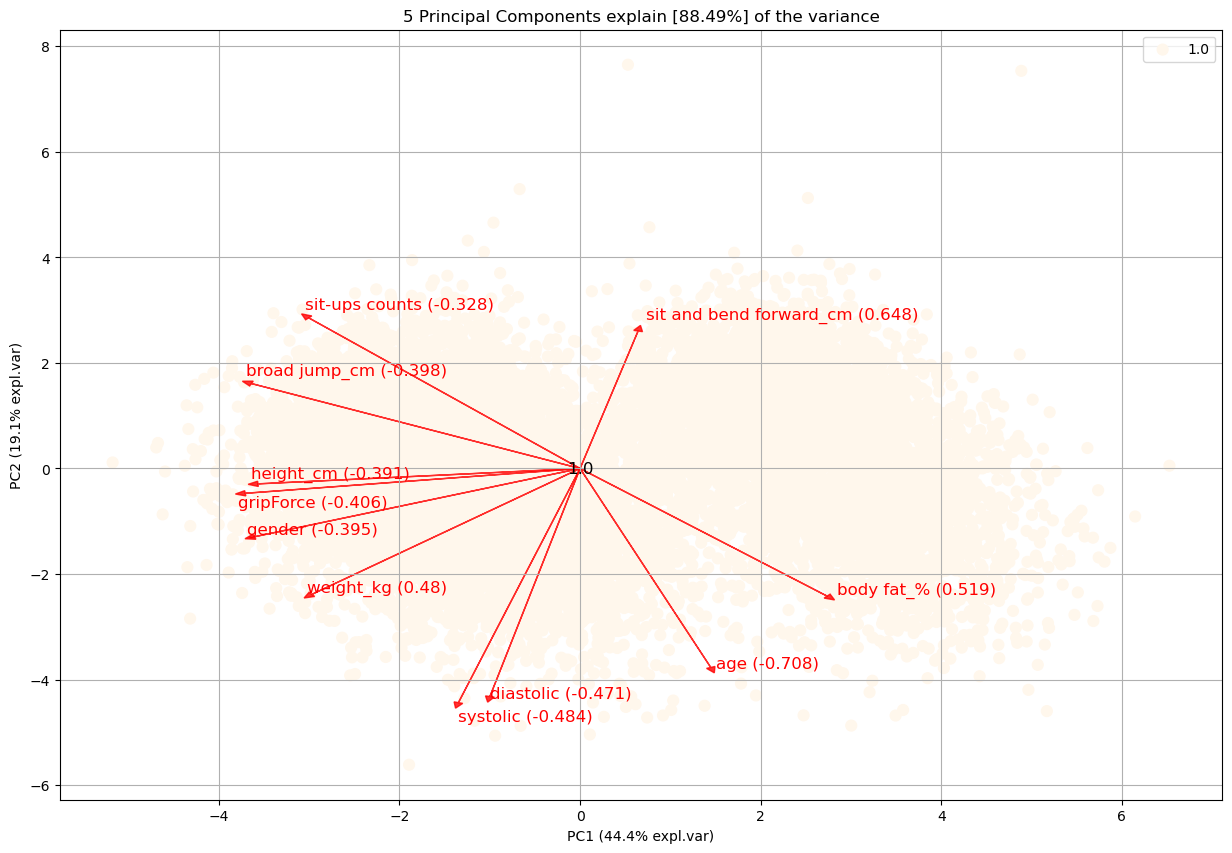

In [19]:
#chose 5 principal components since it explains a total variance of 88.5%

from pca import pca

model = pca(n_components=5)
results = model.fit_transform(df_scaled, col_labels=column_names)
fig, ax = model.plot()
fig, ax = model.biplot(n_feat=11,cmap="OrRd")
plt.show()

## CLUSTERING- KMEANS

In [20]:
from sklearn.cluster import KMeans

In [21]:
pca = PCA(n_components=5)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)

Text(0, 0.5, 'Inertia')

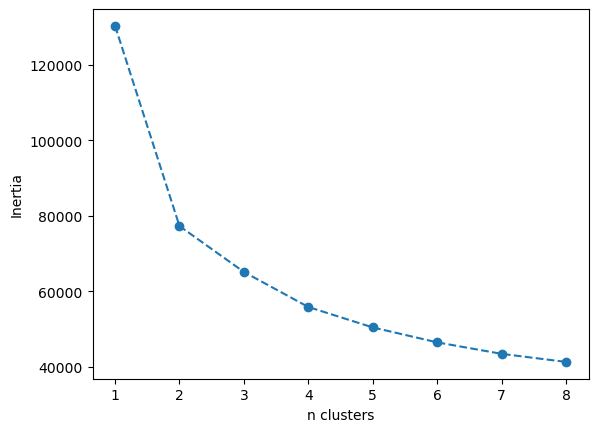

In [22]:
inertia = []
n_clusters = 8

for n in range(1, n_clusters+1):
    model = KMeans(n)
    #print(n)
    model.fit(df_pca)
    inertia.append(model.inertia_)  

n_cluster = range(1,n_clusters+1)
plt.plot(n_cluster,inertia,marker='o', linestyle='--')
plt.xlabel('n clusters')
plt.ylabel('Inertia')

In [23]:
#inter-cluster distances
from sklearn.metrics.pairwise import euclidean_distances

dists = euclidean_distances(model.cluster_centers_)

tri_dists = dists[np.triu_indices(4, 1)]
max_dist, avg_dist, min_dist = tri_dists.max(), tri_dists.mean(), tri_dists.min()

print(max_dist, avg_dist, min_dist)

5.8887325483266375 4.125215733971413 2.3770057290993485


In [24]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
inertia_list =[]
intercluster_distances =[]
n_clust=[2,3,4,5,6,7,8]

for i in range(2, n_clusters+1):
    kmeans = KMeans(n_clusters = i,max_iter = 500,  init = 'random',random_state=84)
    kmeans.fit(df_pca)
    # check inter cluster distance
    dists = euclidean_distances(kmeans.cluster_centers_)
    tri_dists = dists[np.triu_indices(i, 1)]
    intercluster_distances.append(tri_dists.mean())
    #check inertia
    inertia_list.append(kmeans.inertia_)
    #silhouette coefficients
    score = silhouette_score(df_pca, kmeans.labels_)
    silhouette_coefficients.append(score)
 

In [25]:
result_df =pd.DataFrame({ 'No of clusters':n_clust,'Inertia':inertia_list,'Inter-cluster distance':intercluster_distances,'sihouette scores':silhouette_coefficients})
result_df = result_df.set_index('No of clusters')
result_df


,Inertia,Inter-cluster distance,sihouette scores
No of clusters,,,
2,77310.620934,4.101511,0.381932
3,65145.437864,3.630203,0.282034
4,55856.889795,3.861508,0.263460
5,50442.591643,3.790439,0.230822
6,46482.146550,3.719027,0.237120
7,43435.901241,3.776138,0.211766
8,41295.265680,3.862765,0.204243


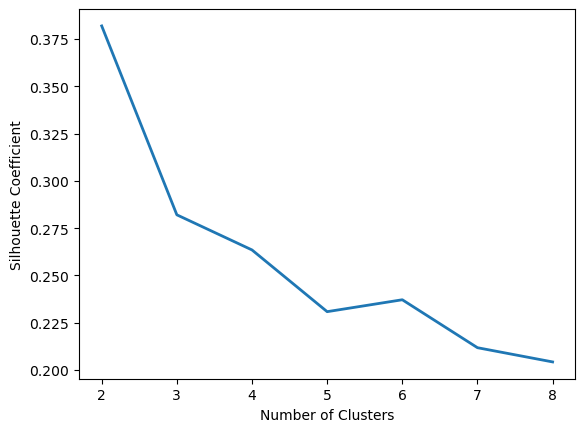

In [26]:
# silhouette score plot

plt.plot(range(2, n_clusters+1), silhouette_coefficients, linewidth=2)
plt.xticks(range(2, n_clusters+1), fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Number of Clusters", fontsize = 10)
plt.ylabel("Silhouette Coefficient", fontsize = 10)
plt.show()

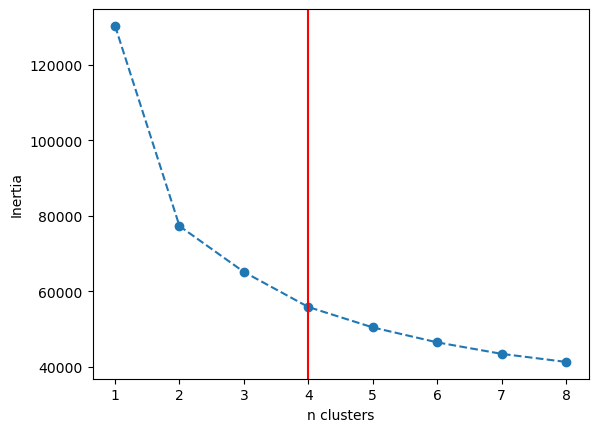

In [27]:
inertia = []
n_clusters = 8

for n in range(1, n_clusters+1):
    model = KMeans(n)
    #print(n)
    model.fit(df_pca)
    inertia.append(model.inertia_)  

n_cluster = range(1,n_clusters+1)
plt.plot(n_cluster,inertia,marker='o', linestyle='--')
plt.xlabel('n clusters')
plt.ylabel('Inertia')
plt.axvline(4, color='r') # vertical
plt.show()

In [28]:
model = KMeans(4, random_state=35)
model.fit(df_pca)

KMeans(n_clusters=4, random_state=35)

## VISUALISING CLUSTERS

In [29]:
df2=df.copy()
df3=pd.DataFrame(df_pca, columns=['component1','component2','component3','component4','component5'])
dfmerge = pd.concat([df2.reset_index(drop= True),df3], axis=1)
dfmerge['cluster'] = model.fit_predict(df_pca)

In [30]:
dfmerge.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'component1', 'component2', 'component3', 'component4',
       'component5', 'cluster'],
      dtype='object')

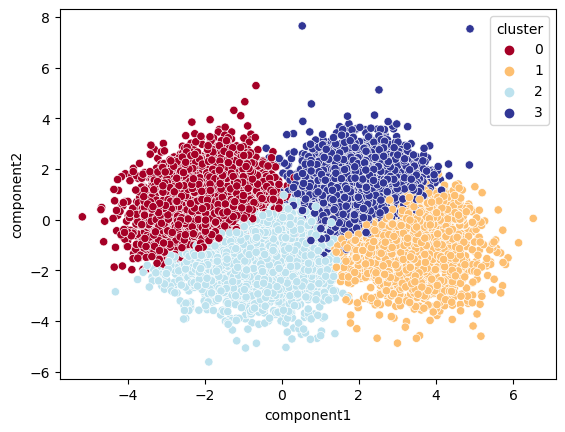

In [31]:
sns.scatterplot(x= dfmerge['component1'], y=dfmerge['component2'], 
            hue=dfmerge['cluster'], palette = 'RdYlBu')
plt.show()

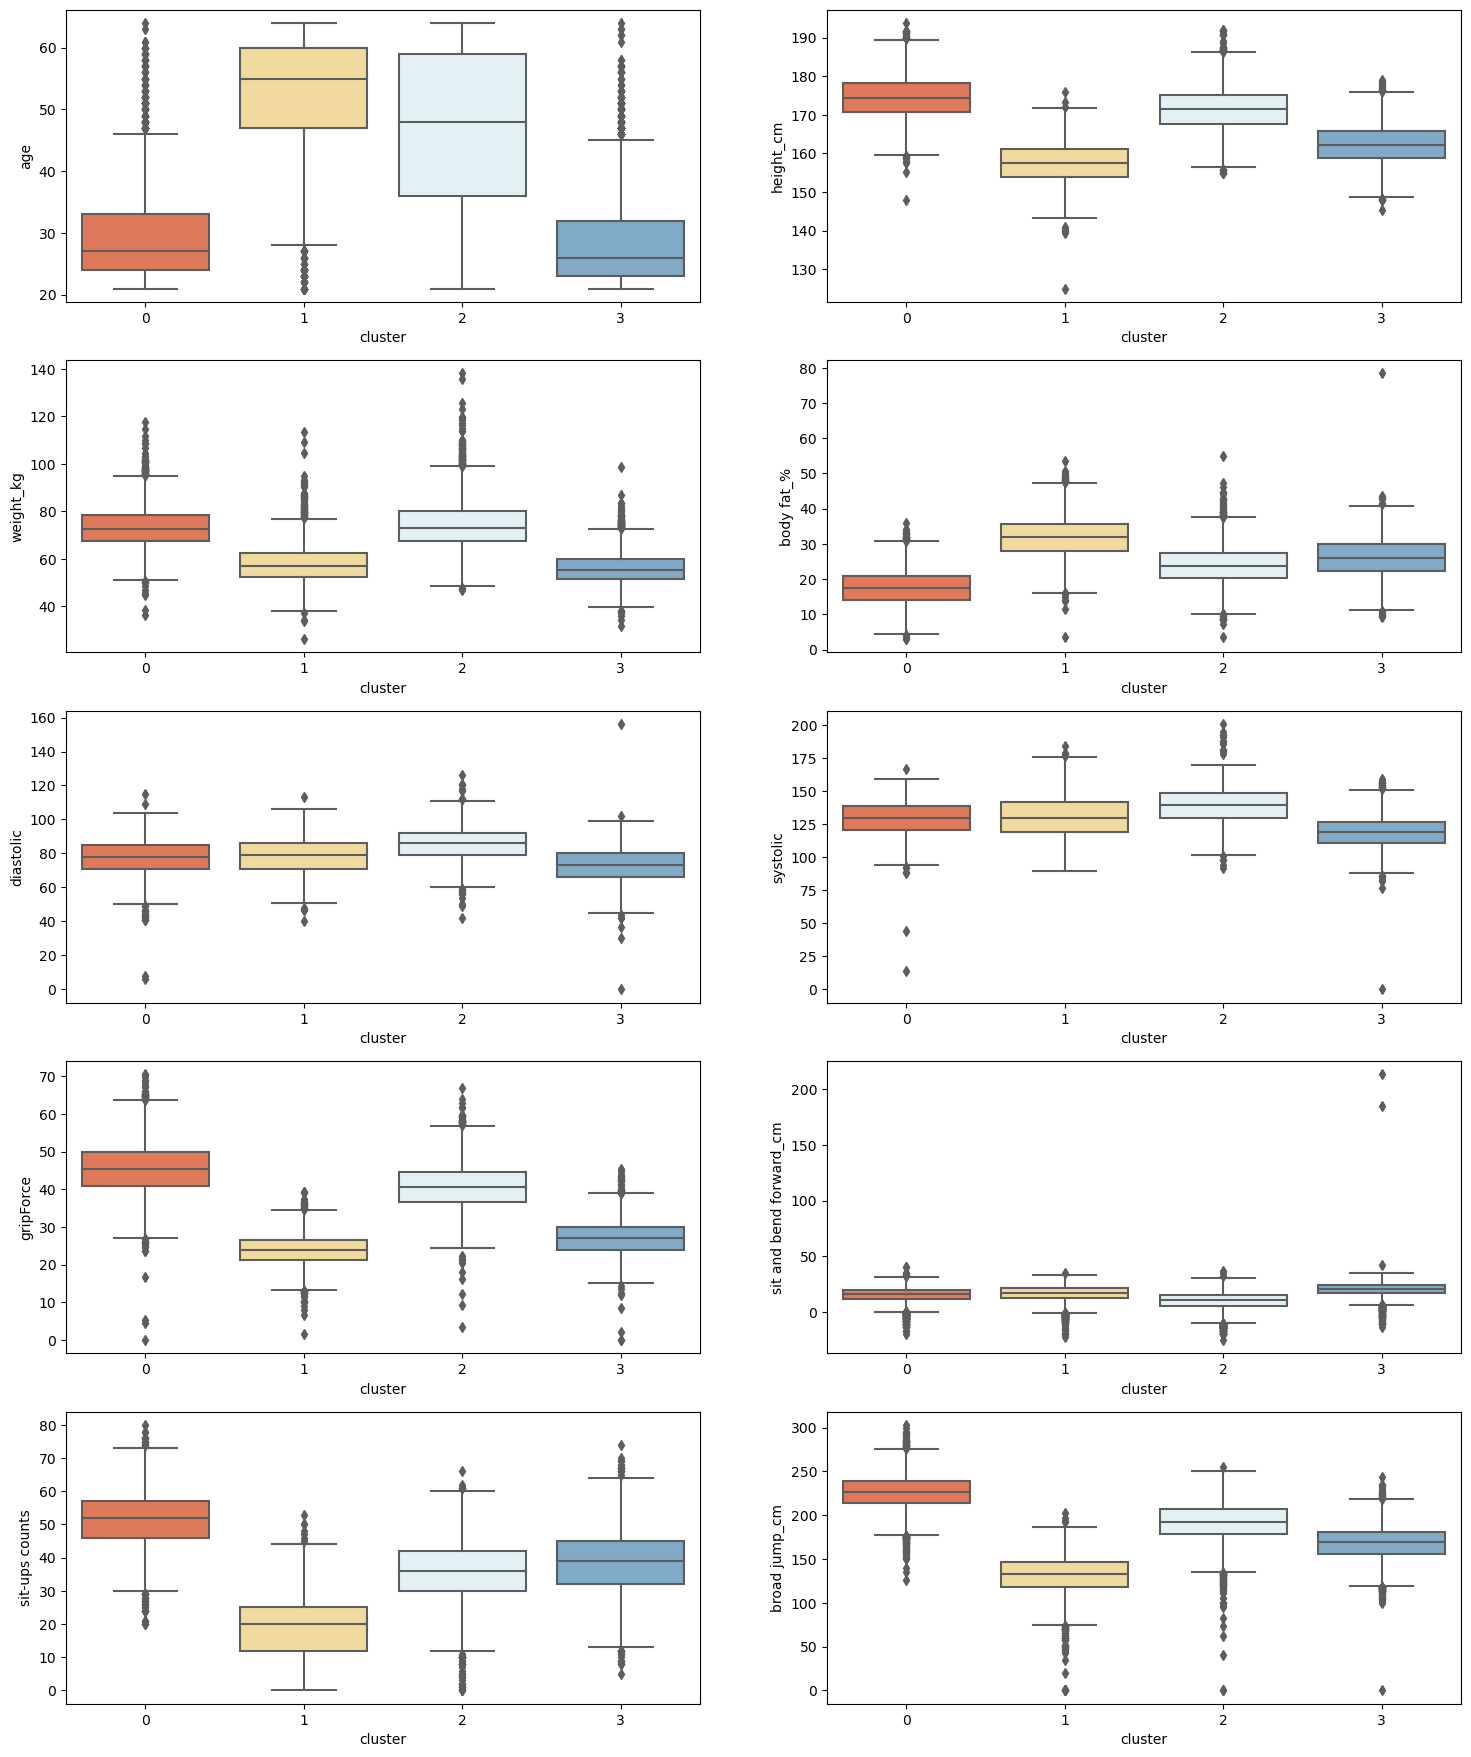

In [32]:
fig, ax = plt.subplots(5, 2, figsize=(18, 22))
for i, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x='cluster', y= i, data=dfmerge, ax=subplot, palette = 'RdYlBu')

## ASSESSING RELATIONSHIPS

In [33]:
# visualising differences in performance segmentation due to gender

dfstack= dfmerge[['gender','cluster']]
dfstack['gender'].replace([0,1],
                        ['female', 'male'], inplace=True)
df_plot= pd.crosstab(index=dfstack['cluster'],
                             columns=dfstack['gender'],
                             normalize="index")
df_plot.head()

gender,female,male
cluster,,
0,0.001189,0.998811
1,0.975831,0.024169
2,0.005682,0.994318
3,0.982753,0.017247


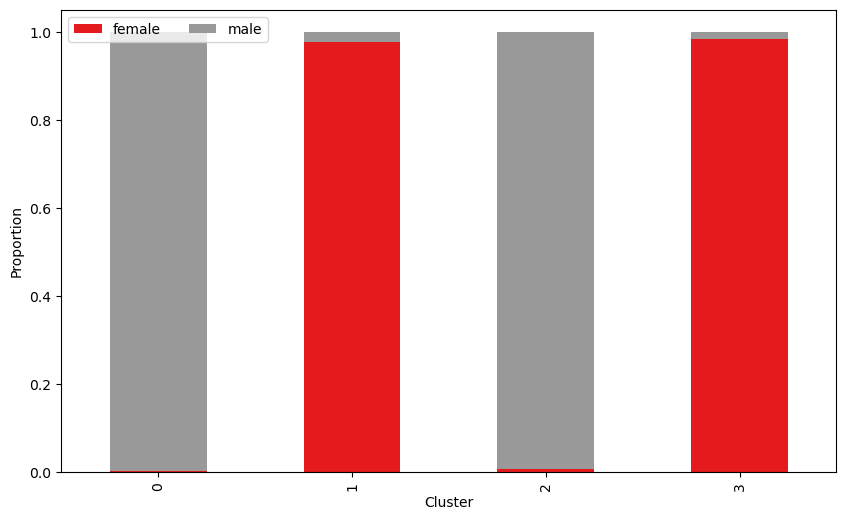

In [34]:
df_plot.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Cluster")
plt.ylabel("Proportion")
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='age'>

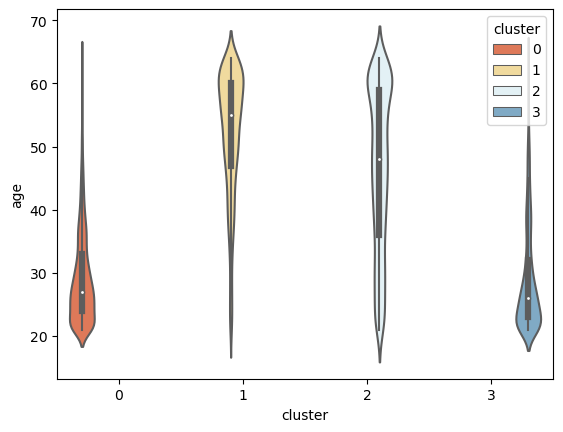

In [35]:
# differences in segmentation owing to age

sns.violinplot(data=dfmerge, x="cluster", y="age", hue="cluster", palette = 'RdYlBu')

<AxesSubplot:xlabel='cluster', ylabel='systolic'>

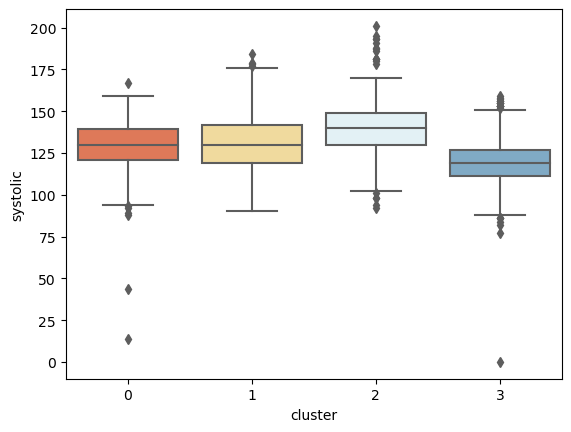

In [36]:
sns.boxplot(x='cluster', y= 'systolic', data=dfmerge, palette = 'RdYlBu')

<AxesSubplot:xlabel='cluster', ylabel='diastolic'>

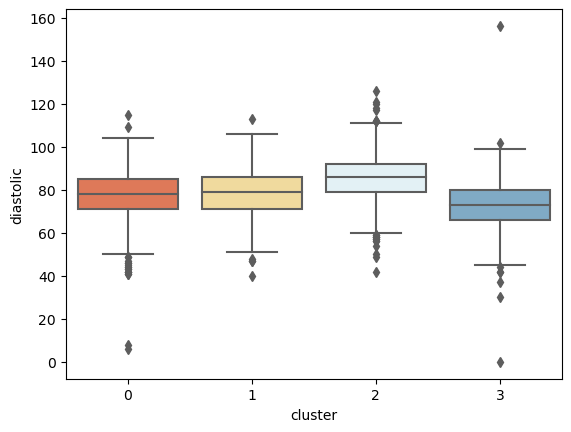

In [37]:
sns.boxplot(x='cluster', y= 'diastolic', data=dfmerge,  palette = 'RdYlBu')

# TASK 2 - REGRESSION 

In [38]:
#dataset from "https://archive-beta.ics.uci.edu/dataset/560/seoul+bike+sharing+demand"

In [39]:
df = pd.read_csv("SeoulBike.csv", encoding= 'unicode_escape') #loading the dataset

## EXPLORING THE DATA

In [40]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [41]:
df[df['Functioning Day'] == 'No']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No


In [42]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [43]:
df = df.drop(['Date'], axis=1) #dropping date as it is not useful for our analysis

In [44]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [45]:
categorical = ['Seasons', 'Holiday', 'Functioning Day' ] 

In [46]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [47]:
df.isna().sum().sum() #checking for null values

0

In [48]:
df.shape

(8760, 13)

In [49]:
numerical = ['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

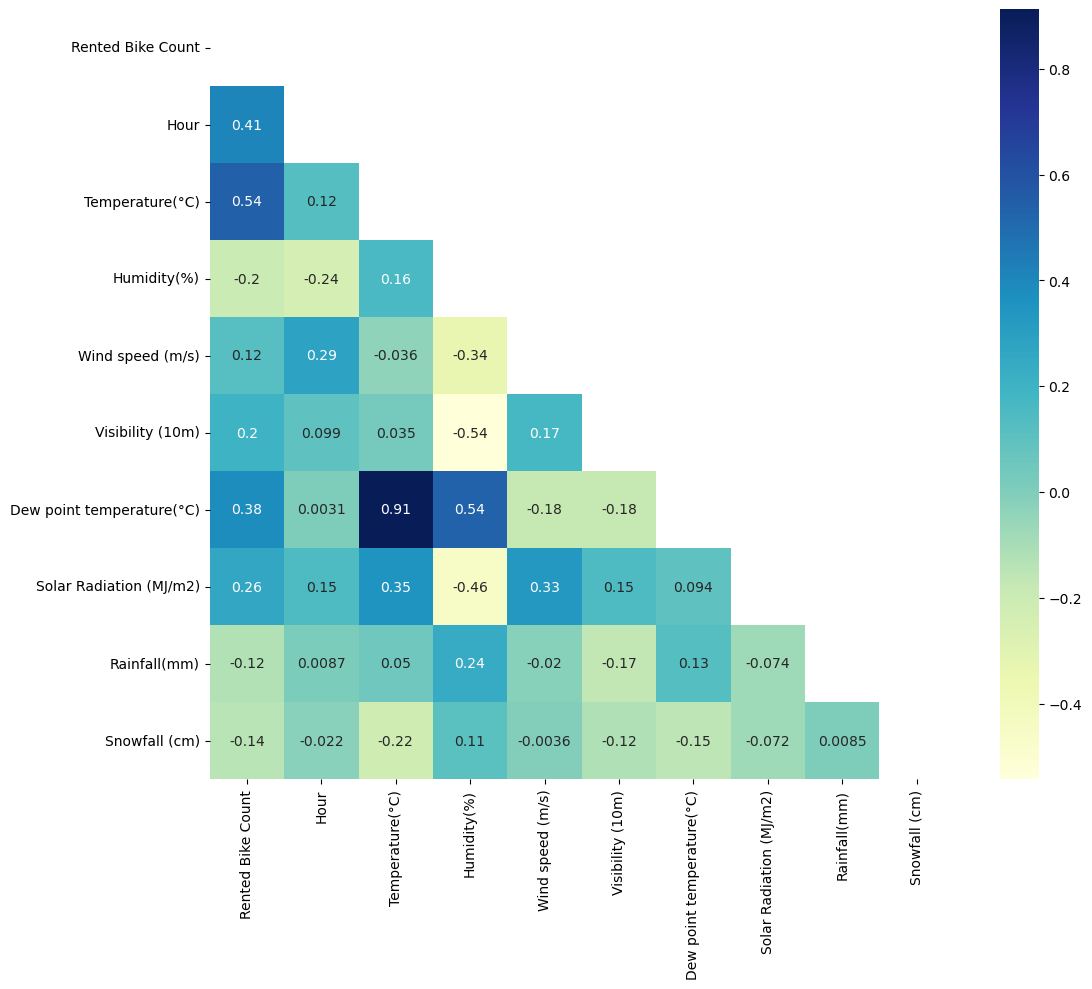

In [50]:
#checking for multi-collinearity

fig, ax = plt.subplots(figsize=(12,10))
mask = np.triu(df.corr()) 
heatmap = sns.heatmap(df.corr(), cmap= "YlGnBu", annot = True, mask = mask)
plt.show()

In [51]:
#dropping 'dew point temperature' due to high collinearity with temp

df = df.drop(['Dew point temperature(°C)'], axis=1)

array([[<AxesSubplot:title={'center':'Hour'}>,
        <AxesSubplot:title={'center':'Temperature(°C)'}>,
        <AxesSubplot:title={'center':'Humidity(%)'}>,
        <AxesSubplot:title={'center':'Wind speed (m/s)'}>],
       [<AxesSubplot:title={'center':'Visibility (10m)'}>,
        <AxesSubplot:title={'center':'Solar Radiation (MJ/m2)'}>,
        <AxesSubplot:title={'center':'Rainfall(mm)'}>,
        <AxesSubplot:title={'center':'Snowfall (cm)'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

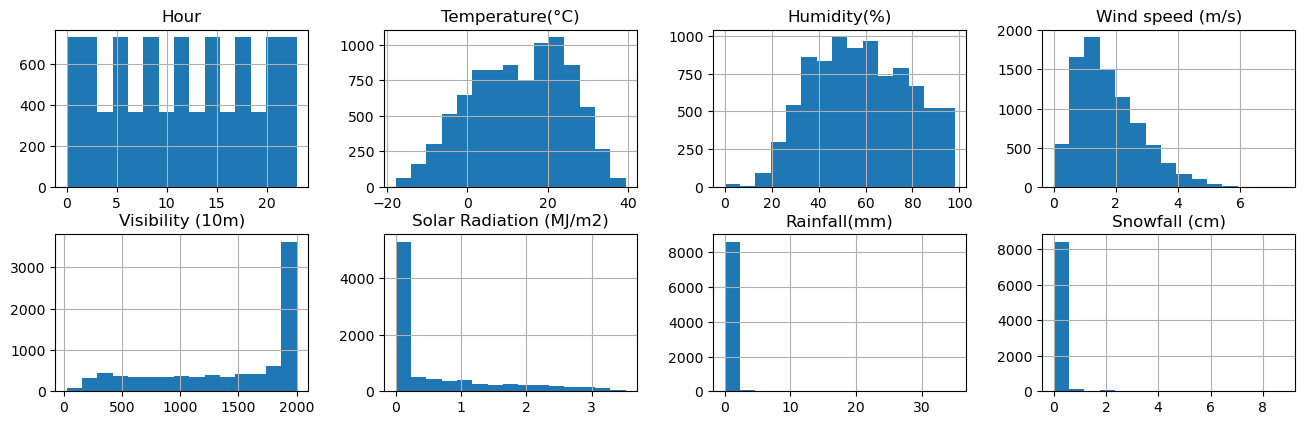

In [52]:
#numerical data distribution

df[numerical].hist(bins=15, figsize=(16, 10), layout=(4, 4))

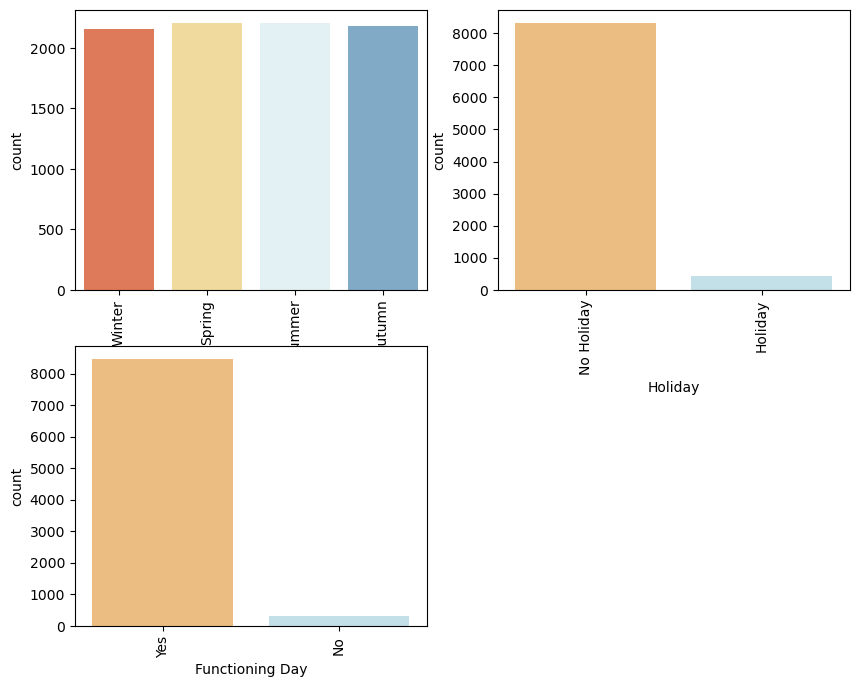

In [53]:
#countplots of categorical variables

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
fig.delaxes(ax[1,1])
for i, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[i], ax=subplot,palette = 'RdYlBu')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


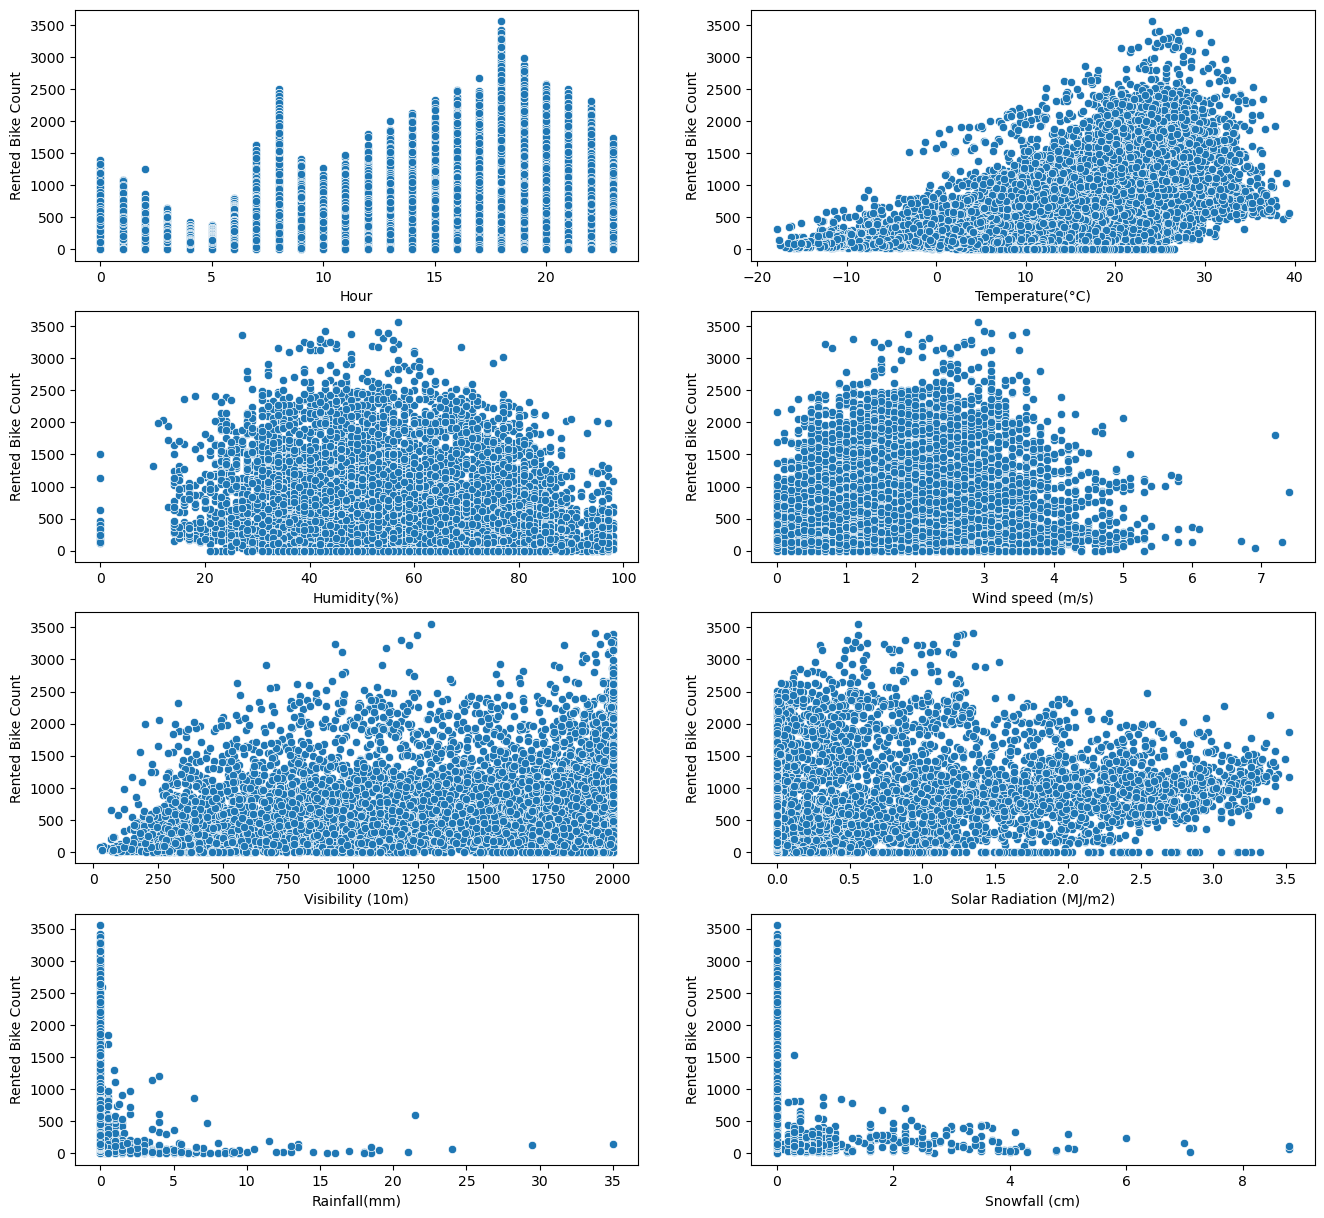

In [54]:
#analysing numeric variables against count of bikes

fig, ax = plt.subplots(4, 2, figsize=(16, 15))
for i, subplot in zip(numerical, ax.flatten()):
    sns.scatterplot(x=i, y='Rented Bike Count', data=df, ax=subplot, palette = 'RdYlBu')

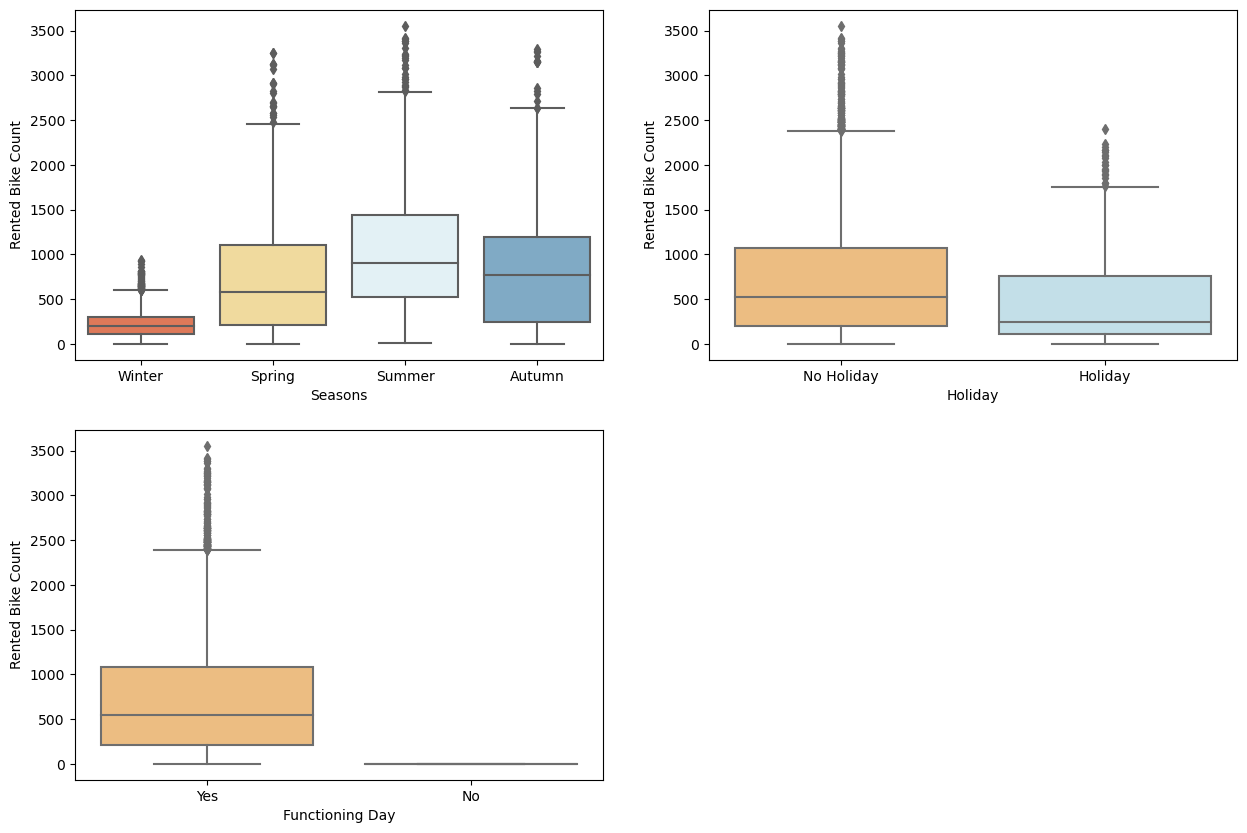

In [55]:
#analysing categorical variables against count of bikes

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.delaxes(ax[1,1])
for i, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=i, y='Rented Bike Count', data=df, ax=subplot,palette = 'RdYlBu')

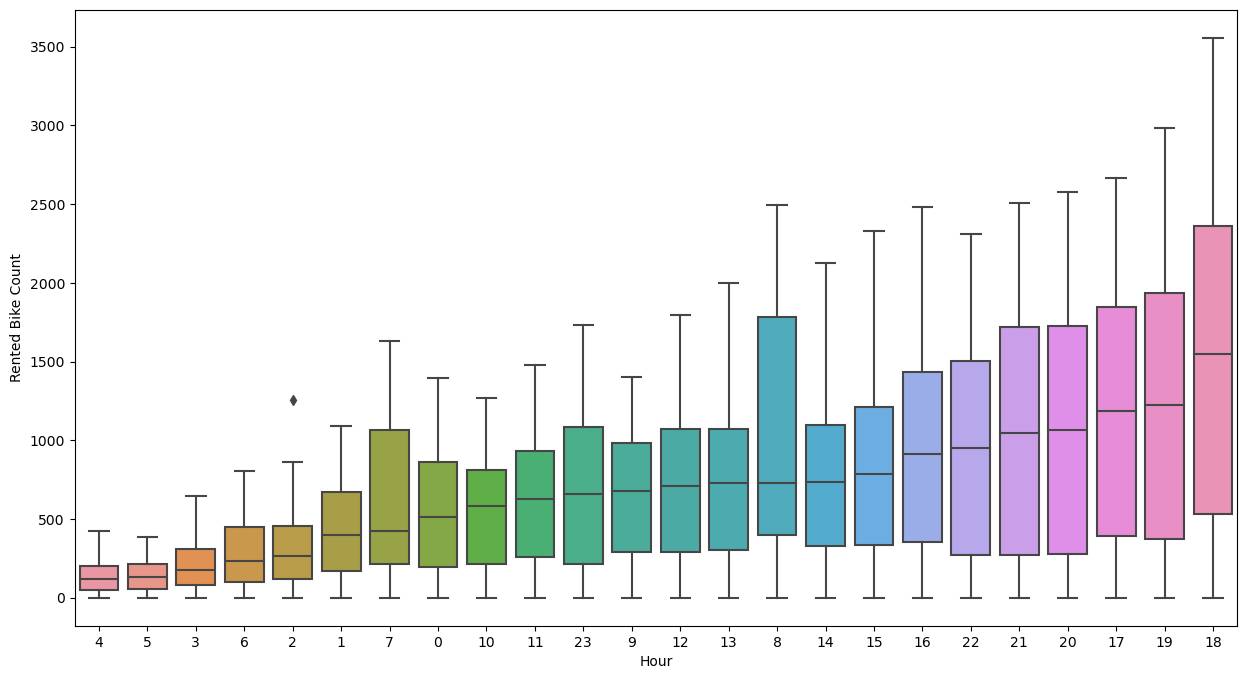

In [56]:
# distribution of the hours of the day by rented bike count

plt.figure(figsize=(15,8))

sorted_h = df.groupby(['Hour'])['Rented Bike Count'].median().sort_values()
ax =sns.boxplot(x=df['Hour'], y=df['Rented Bike Count'], order=list(sorted_h.index))

In [57]:
df= df.astype({'Seasons':'object', 'Holiday':'object', 'Functioning Day':'object'})
df.dtypes

Rented Bike Count            int64
Hour                         int64
Temperature(°C)            float64
Humidity(%)                  int64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Snowfall (cm)              float64
Seasons                     object
Holiday                     object
Functioning Day             object
dtype: object

## PRE-PROCESSING

In [58]:
#encoding categorical string variables

le=LabelEncoder()
for i in categorical:
    df[i] = le.fit_transform(df[i])
    print(le.classes_)

df.head()

['Autumn' 'Spring' 'Summer' 'Winter']
['Holiday' 'No Holiday']
['No' 'Yes']


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,3,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,3,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,3,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,3,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,3,1,1


In [59]:
# Labels

# Functioning Day -> Yes =1 No =0
# Holiday -> No =1  Yes =0
# Seasons -> Autumn=0 Spring=1 Summer=2 Winter=3 

In [60]:
features = df.drop(['Rented Bike Count'], axis = 1)
labels = df['Rented Bike Count']

In [61]:
# Split into train and test data

from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

In [41]:
from sklearn.model_selection import train_test_split

In [62]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
579,3,-2.3,52,3.4,1947,0.00,0.0,0.0,3,0,1
2182,22,-3.6,52,3.7,1277,0.00,0.0,0.0,1,0,1
6336,0,25.1,79,0.5,1891,0.00,0.0,0.0,2,1,1
3011,11,7.1,93,2.6,697,0.19,0.0,0.0,1,1,1
3479,23,9.6,44,0.7,2000,0.00,0.0,0.0,1,1,1


## REGRESSION MODELS

In [63]:
#creating a pipeline with pre-processing to run the regression models

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer()), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
data_transformer = ColumnTransformer(transformers=[('numerical', numerical_transformer, numerical),
                                                   ('categorical', categorical_transformer, categorical)])

In [64]:
#creating a list of models for the loop

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_reg = []
model_reg.append(LinearRegression())
model_reg.append(Lasso(alpha = 0.001))
model_reg.append(Ridge(alpha = 0.1))
model_reg.append(DecisionTreeRegressor())
model_reg.append(RandomForestRegressor())
model_reg.append(KNeighborsRegressor())

In [65]:
#fitting the models and evaluating its metrics

from sklearn import metrics
from sklearn.metrics import r2_score


model_reglist = ['LinearRegression','Lasso', 'Ridge','DecisionTree','RandomForestRegressor','KNeighborsRegressor' ]
score_list = []
mae_list = []
mse_list = []
rmse_list = []
accuracy_list= []

for model in model_reg:
    pipeline = Pipeline([('data_transformer', data_transformer),('regressor', model)])
    pipeline.fit(X_train,y_train)
    y_predreg = pipeline.predict(X_test)
    score_list.append(pipeline.score(X_test,y_test))
    mae_list.append(metrics.mean_absolute_error(y_test, y_predreg))
    mse_list.append(metrics.mean_squared_error(y_test, y_predreg))
    rmse_list.append(np.sqrt(metrics.mean_absolute_error(y_test, y_predreg)))
    accuracy_list.append(r2_score(y_test,y_predreg)*100)
    


In [66]:
# display results

result_df =pd.DataFrame({'Model':model_reglist, 'Variance Score':score_list, 'MAE':mae_list, 'MSE':mse_list, 'RMSE':rmse_list, 'R2 score':accuracy_list})
result_df

,Model,Variance Score,MAE,MSE,RMSE,R2 score
0,LinearRegression,0.528119,330.320513,195373.269972,18.174722,52.811949
1,Lasso,0.528120,330.319851,195373.036250,18.174704,52.812005
2,Ridge,0.528123,330.317173,195371.845661,18.174630,52.812293
3,DecisionTree,0.738381,190.359045,108318.535455,13.797067,73.838076
4,RandomForestRegressor,0.861862,144.439249,57193.405666,12.018288,86.186210
5,KNeighborsRegressor,0.771086,194.003805,94777.354175,13.928525,77.108646


In [67]:
# Random Forest Regressor has the best score across all metrics when compared to other models
# linear models are not performing well, may hint at a non-linear relationship.

In [68]:
#model evaluation function

def evaluate_r(model, test_features, test_labels):
    predictions_reg = model.predict(test_features)
    score_reg = (model.score(test_features,test_labels))
    mae_reg = (metrics.mean_absolute_error(test_labels, predictions_reg))
    mse_reg= (metrics.mean_squared_error(test_labels, predictions_reg))
    rmse_reg = (np.sqrt(metrics.mean_absolute_error(test_labels, predictions_reg)))
    r2_reg = (r2_score(test_labels,predictions_reg)*100)
    print('Model Performance')
    print('Variance score: {:0.4f}.'.format(score_reg))
    print('Mean Absolute Error = {:0.2f}.'.format(mae_reg))
    print('Mean Squared Error = {:0.2f}.'.format(mse_reg))
    print('Residual Mean Squared Error = {:0.2f}'.format(rmse_reg))
    print('R Squared = {:0.2f}.'.format(r2_reg))
    

## RANDOM FOREST REGRESSOR

In [69]:
from sklearn.ensemble import RandomForestRegressor
regressor = Pipeline([('data_transformer', data_transformer),('regressor', RandomForestRegressor(random_state=32))])
regressor.fit(X_train,y_train)

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Hour', 'Temperature(°C)',
                                                   'Humidity(%)',
                                                   'Wind speed (m/s)',
                                                   'Visibility (10m)',
                                                   'Solar Radiation (MJ/m2)',
                                                   'Rainfall(mm)',
                                                   'Snowfall (cm)']),
                                                 ('categorical',
      

In [70]:
#assesing on test data

evaluate_r(regressor, X_test,y_test)

Model Performance
Variance score: 0.8619.
Mean Absolute Error = 144.56.
Mean Squared Error = 57165.42.
Residual Mean Squared Error = 12.02
R Squared = 86.19.


In [71]:
# Get numerical feature importances

feature_list =['Hour','Seasons', 'Holiday', 'Functioning Day','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)', 'Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

importances = list(regressor[1][1].feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Temperature(°C)      Importance: 0.34
Variable: Hour                 Importance: 0.28
Variable: Humidity(%)          Importance: 0.1
Variable: Solar Radiation (MJ/m2) Importance: 0.1
Variable: Seasons              Importance: 0.03
Variable: Wind speed (m/s)     Importance: 0.02
Variable: Visibility (10m)     Importance: 0.02
Variable: Rainfall(mm)         Importance: 0.01
Variable: Holiday              Importance: 0.01
Variable: Snowfall (cm)        Importance: 0.0
Variable: Functioning Day      Importance: 0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Temperature(°C)'),
  Text(1, 0, 'Hour'),
  Text(2, 0, 'Humidity(%)'),
  Text(3, 0, 'Solar Radiation (MJ/m2)'),
  Text(4, 0, 'Seasons'),
  Text(5, 0, 'Wind speed (m/s)'),
  Text(6, 0, 'Visibility (10m)'),
  Text(7, 0, 'Rainfall(mm)'),
  Text(8, 0, 'Holiday'),
  Text(9, 0, 'Snowfall (cm)'),
  Text(10, 0, 'Functioning Day')])

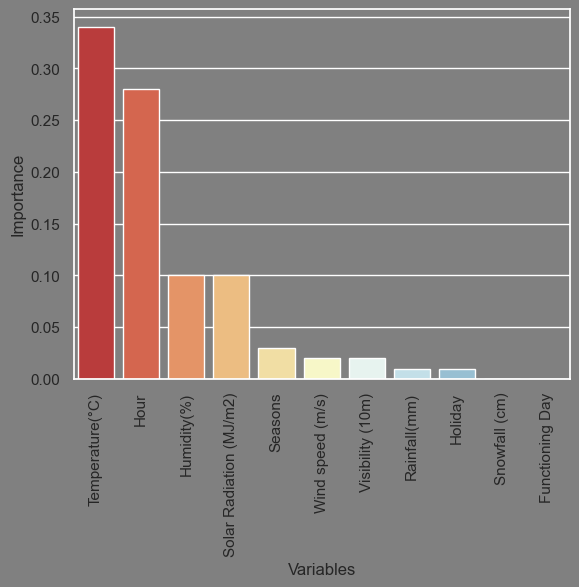

In [72]:
#plotting feature importance

feature_imp = pd.DataFrame(feature_importances, columns=('Variables', 'Importance'))
sns.set(rc={'axes.facecolor':'grey', 'figure.facecolor':'grey'})
sns.barplot(x='Variables' , y= 'Importance', data=feature_imp, palette = 'RdYlBu')
plt.xticks(rotation=90)

In [73]:
#removing least important features and testing modern performance

X_train2 = X_train.drop(['Snowfall (cm)','Functioning Day'], axis =1)
X_test2 = X_test.drop(['Snowfall (cm)','Functioning Day'], axis=1)

In [74]:
numerical = ['Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)', 'Solar Radiation (MJ/m2)','Rainfall(mm)']
categorical = ['Seasons', 'Holiday']
numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer()), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
data_transformer = ColumnTransformer(transformers=[('numerical', numerical_transformer, numerical),
                                                   ('categorical', categorical_transformer, categorical)])
regressor2 = Pipeline([('data_transformer', data_transformer),('regressor', RandomForestRegressor(random_state=32))])
regressor2.fit(X_train2,y_train)

evaluate_r(regressor2,X_test2,y_test)

Model Performance
Variance score: 0.7781.
Mean Absolute Error = 177.03.
Mean Squared Error = 91876.06.
Residual Mean Squared Error = 13.31
R Squared = 77.81.


In [75]:
# Model does better without removing low importance variables

## HYPER-PARAMETER TUNING RF

In [76]:
regressor[1][1].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 256222763,
 'splitter': 'best'}

In [77]:
sorted(metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [78]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RepeatedStratifiedKFold 

pram_dict = {
    'max_depth': [None,1,2,3],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'max_features': ['sqrt', 'log2', 'auto'],
    'min_samples_leaf': [0,1,2,3],
    'min_samples_split':[0,1,2,3],
}

In [79]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=123)
gridSearch = GridSearchCV(estimator=regressor[1],
                           param_grid =pram_dict,
                           scoring='r2',
                           cv=cv,
                           n_jobs=-1,
                           verbose=10)
gridSearch.fit(X_train, y_train)
gridSearch.best_params_

Fitting 20 folds for each of 768 candidates, totalling 15360 fits


{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [80]:
best_grid = gridSearch.best_estimator_
grid_accuracy = evaluate_r(best_grid, X_test, y_test)

Model Performance
Variance score: 0.8604.
Mean Absolute Error = 145.30.
Mean Squared Error = 57783.90.
Residual Mean Squared Error = 12.05
R Squared = 86.04.


In [81]:
# model does better with the default setup

# TASK 3- CLASSIFICATION

In [82]:
#dataset from "https://archive-beta.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success"

In [139]:
df = pd.read_csv("Student.csv",sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## EXPLORING THE DATA

In [140]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [142]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [143]:
num_list = ['Previous qualification (grade)','Admission grade','Age at enrollment', 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP',]
cat_list = ['Marital status','Application mode','Application order','Course',"Daytime/evening attendance\t",'Previous qualification','Nacionality',"Mother's qualification","Father's qualification","Mother's occupation","Father's occupation",'Displaced','Educational special needs','Debtor','Tuition fees up to date','Gender','Scholarship holder','International']

In [149]:
col_names =df.columns.values.tolist()
col_names.remove('Target')

In [150]:
from sklearn.preprocessing import LabelEncoder

for i in cat_list:
    df[i] = LabelEncoder().fit_transform(df[i])

In [151]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,7,5,1,1,0,122.0,0,12,9,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,0,5,1,10,1,0,160.0,0,0,2,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,0,0,5,4,1,0,122.0,0,21,26,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,0,7,2,14,1,0,122.0,0,22,26,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,1,11,1,2,0,0,100.0,0,21,27,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [152]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.178571,5.886980,1.727396,8.899186,0.890823,1.531420,132.613314,0.254521,11.322107,15.455244,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.311632,4.331792,0.311897,3.963707,13.188332,1.748447,9.026251,11.044800,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,0.000000,0.000000,1.000000,5.000000,1.000000,0.000000,125.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,0.000000,7.000000,1.000000,9.000000,1.000000,0.000000,133.100000,0.000000,12.000000,13.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,0.000000,11.000000,2.000000,12.000000,1.000000,0.000000,140.000000,0.000000,21.000000,26.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,5.000000,17.000000,7.000000,16.000000,1.000000,16.000000,190.000000,20.000000,28.000000,33.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [153]:
df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,0,0,6,14,1,0,125.0,0,0,0,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,0,0,2,14,1,0,120.0,18,0,0,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,0,0,1,11,1,0,154.0,0,21,26,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,0,0,1,8,1,0,180.0,0,21,26,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,0,4,1,14,1,0,152.0,8,22,26,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [154]:
df.shape

(4424, 37)

In [155]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [156]:
df['Target'].replace(['Graduate','Enrolled'],
                        ['Non-Dropout','Non-Dropout'], inplace=True)
df['Target'].value_counts()

Non-Dropout    3003
Dropout        1421
Name: Target, dtype: int64

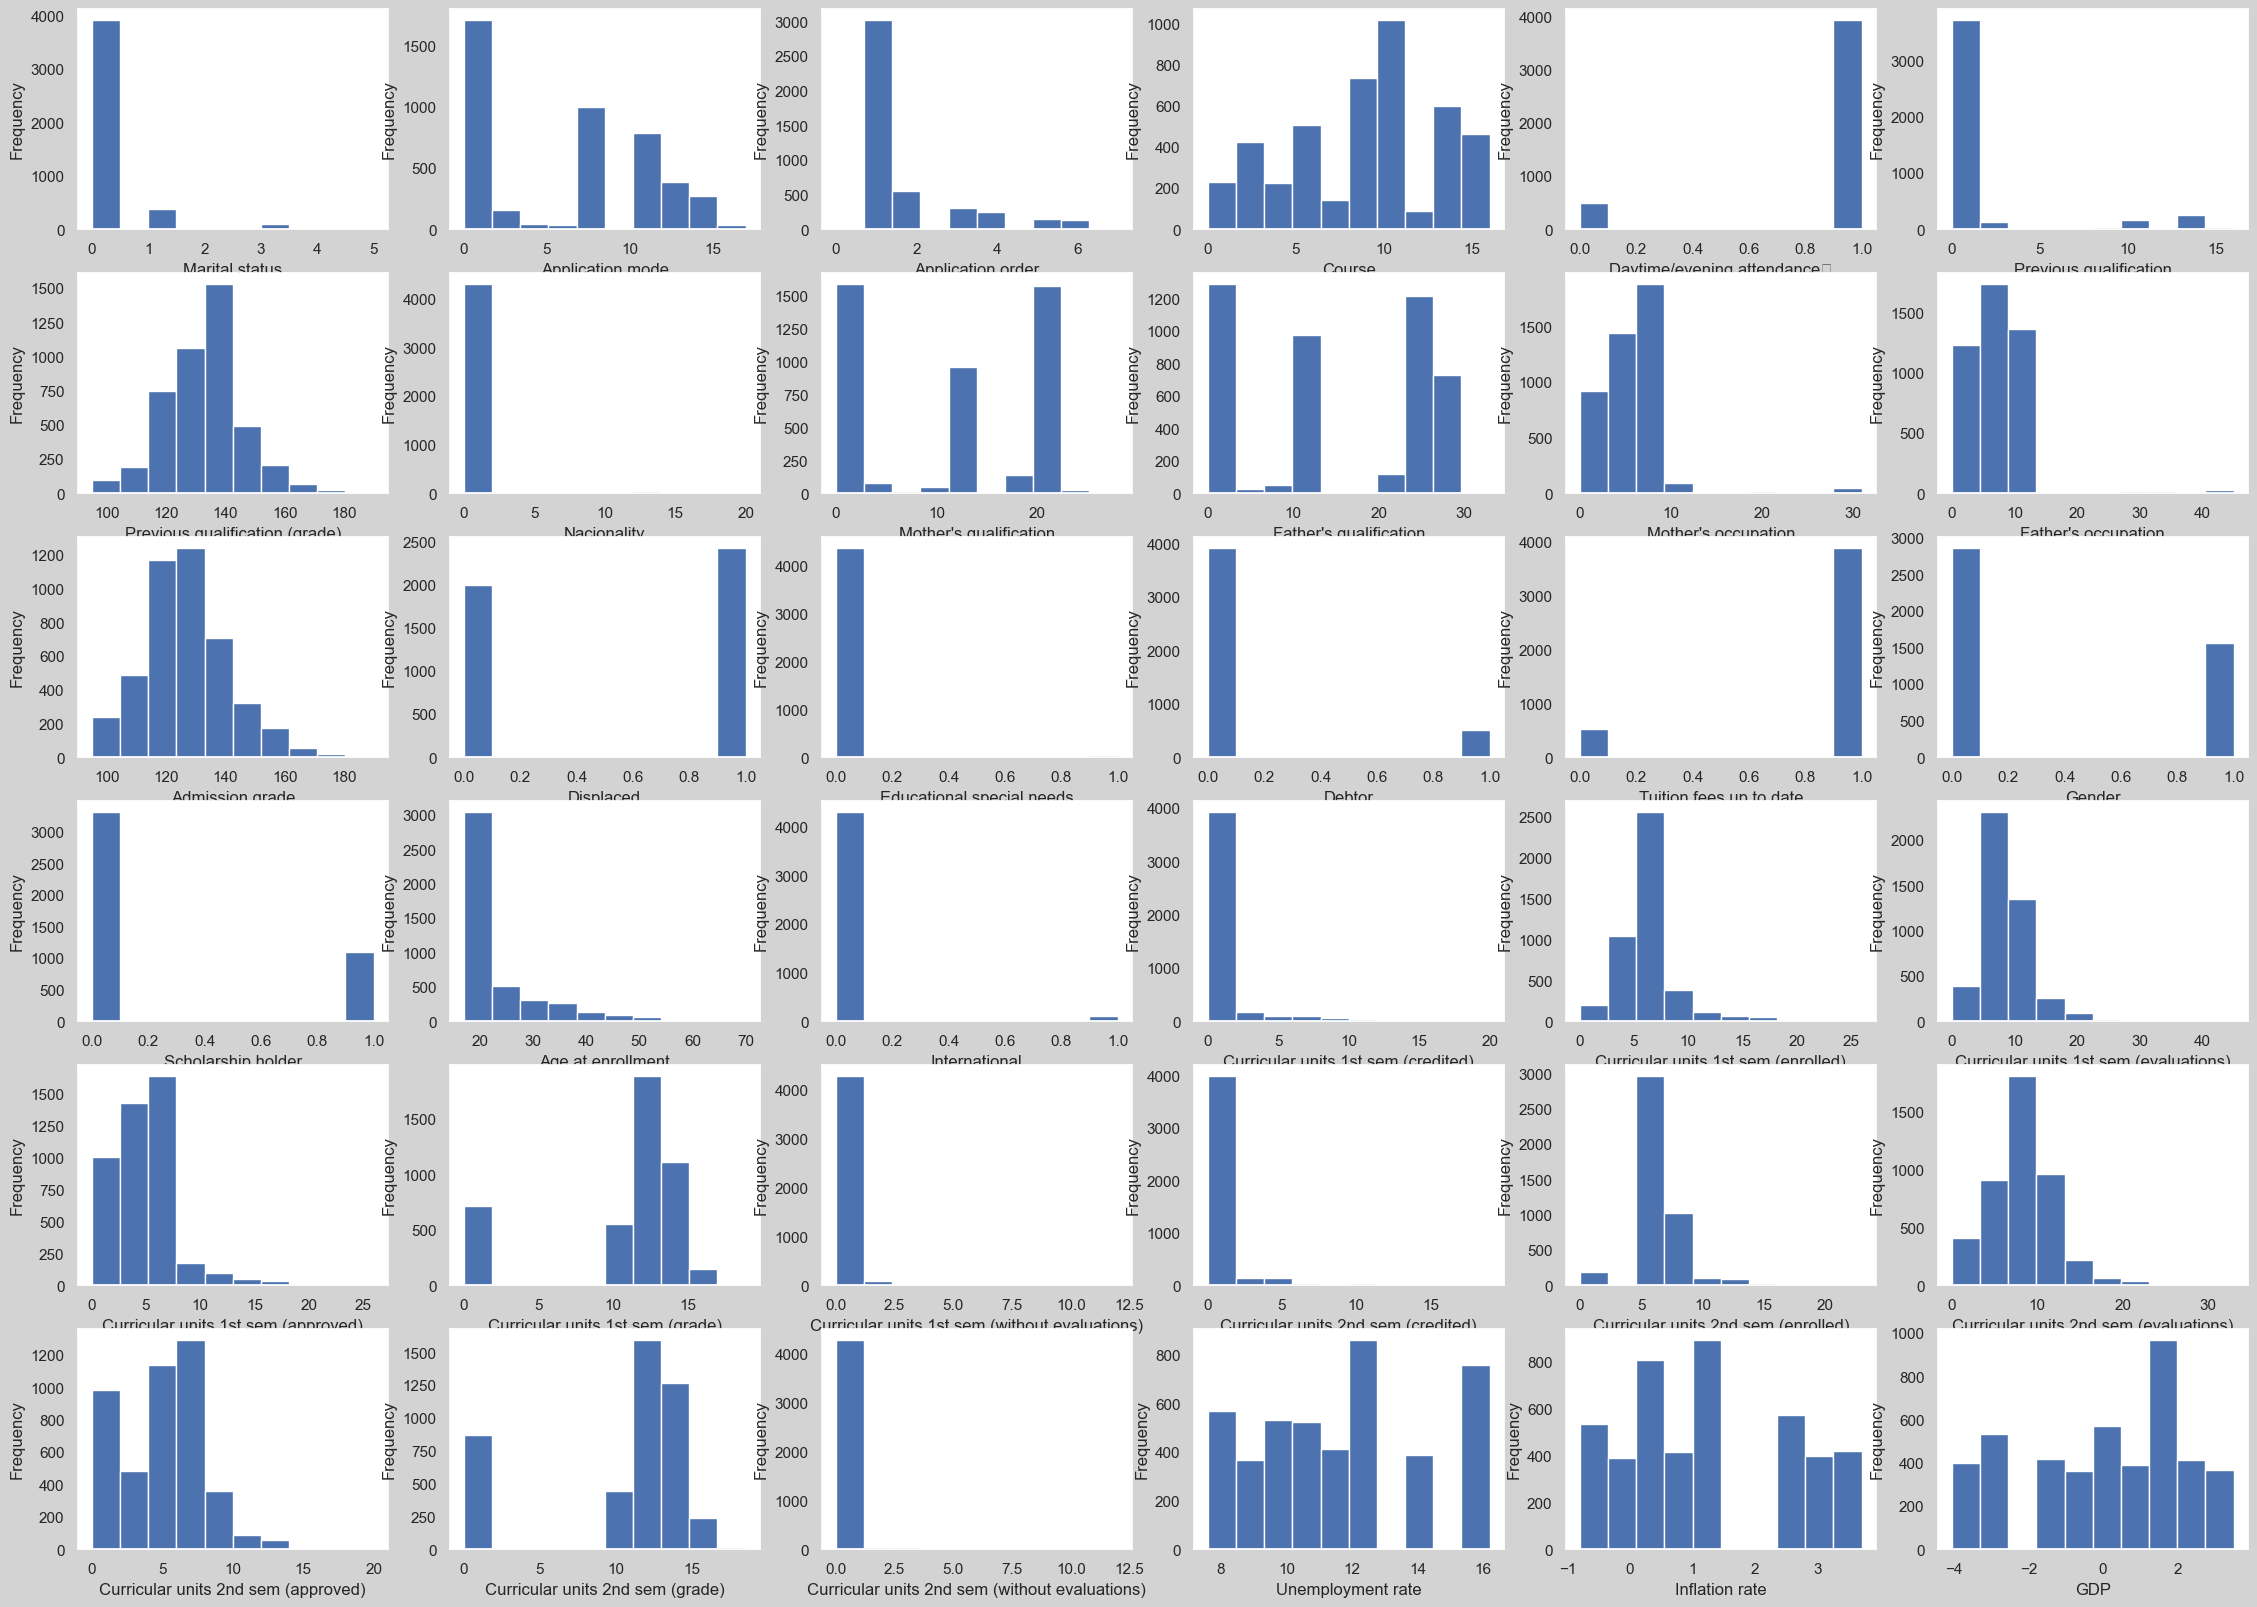

In [95]:
# uni-variate analysis
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'lightgrey'})

fig = plt.figure(figsize=(28, 20))
i = 0
for column in col_names:
    sub = fig.add_subplot(6, 6, i + 1)
    sub.set_xlabel(column)
    df[column].plot(kind = 'hist')
    i = i + 1

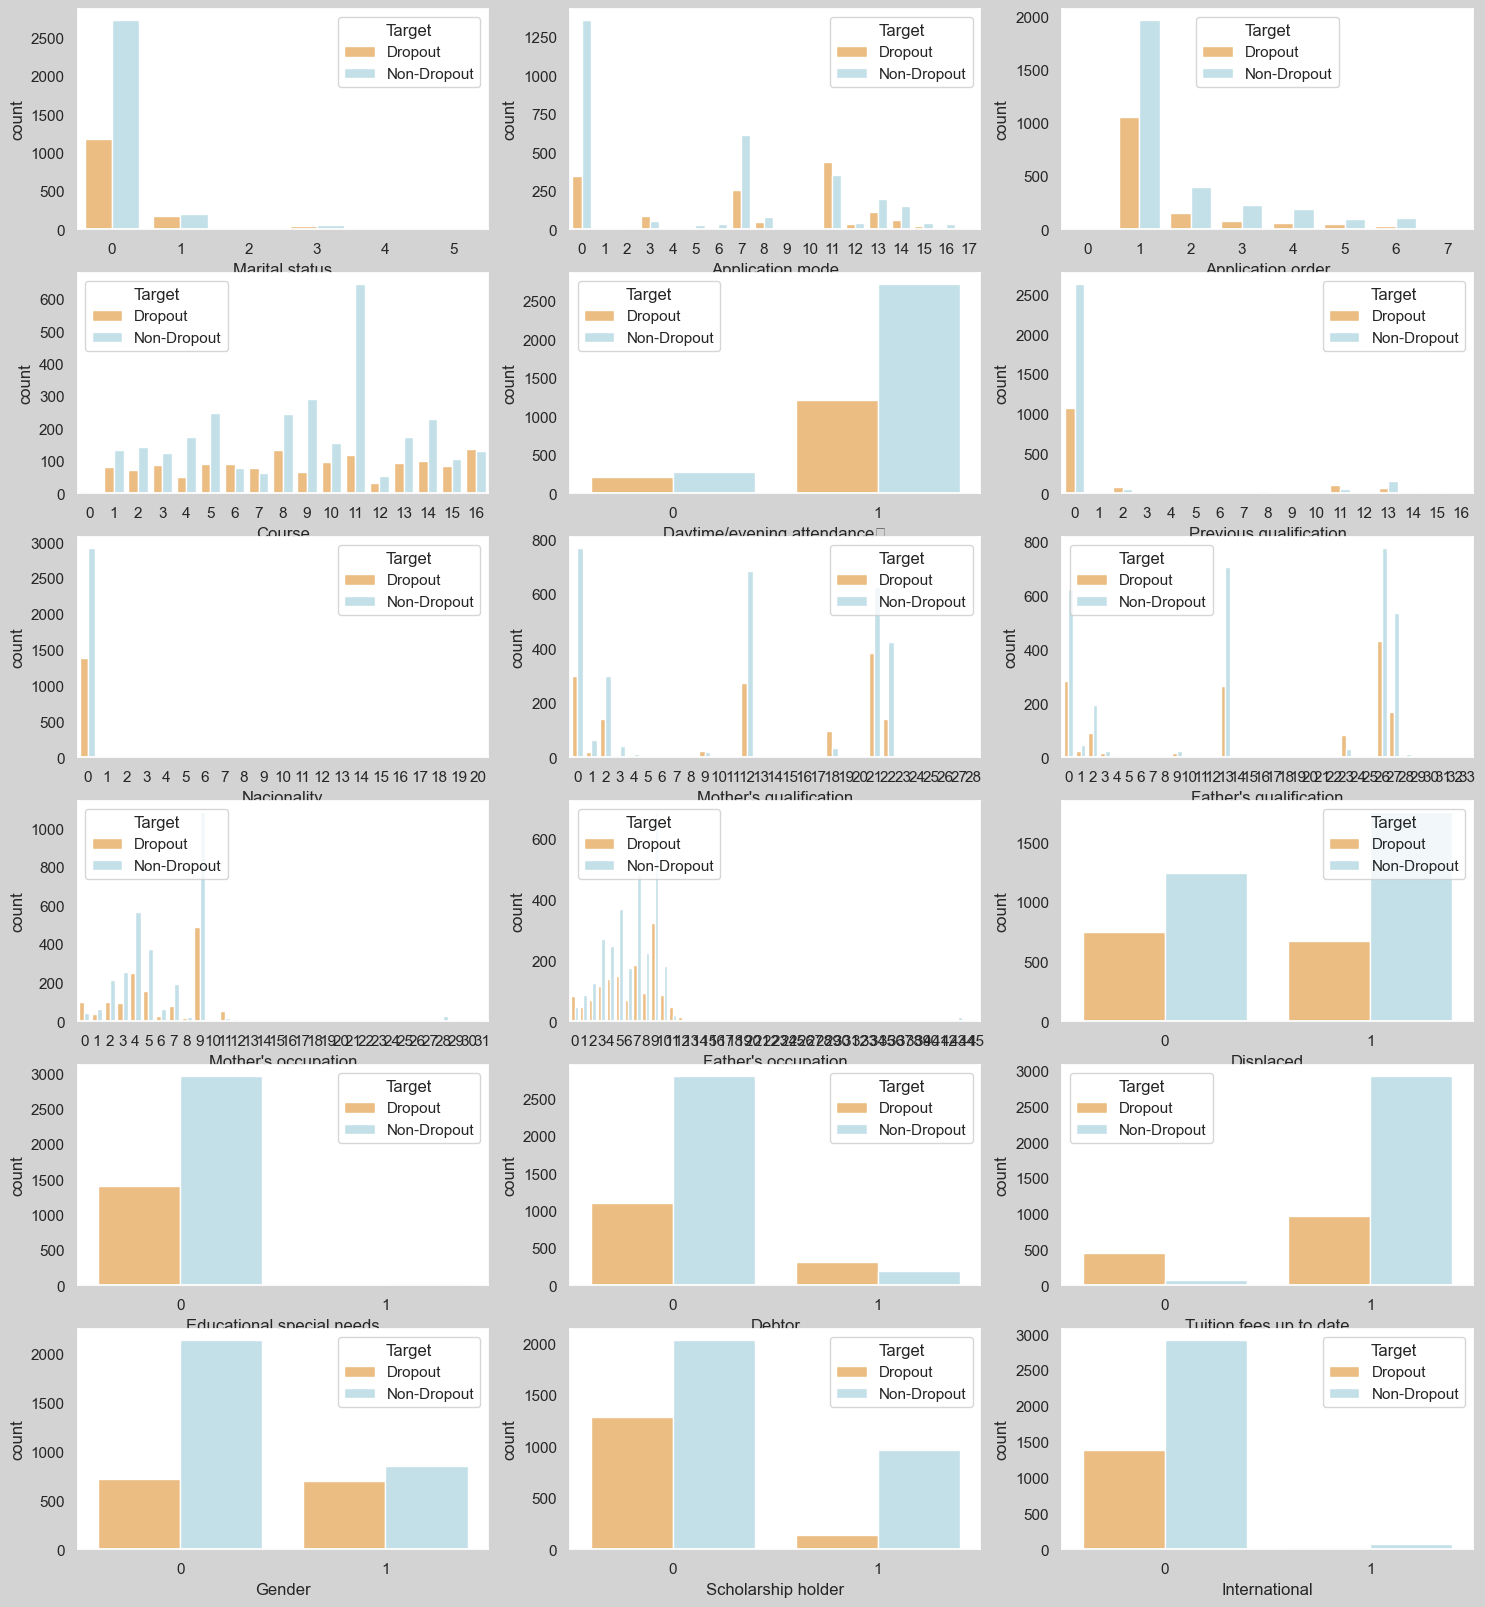

In [96]:
#categorical features vs. Target 
#Barplot

fig, ax = plt.subplots(6, 3, figsize=(18, 20))
for i, subplot in zip(cat_list, ax.flatten()):
    sns.countplot(x=i, data=df, ax=subplot, palette = 'RdYlBu',hue = 'Target')


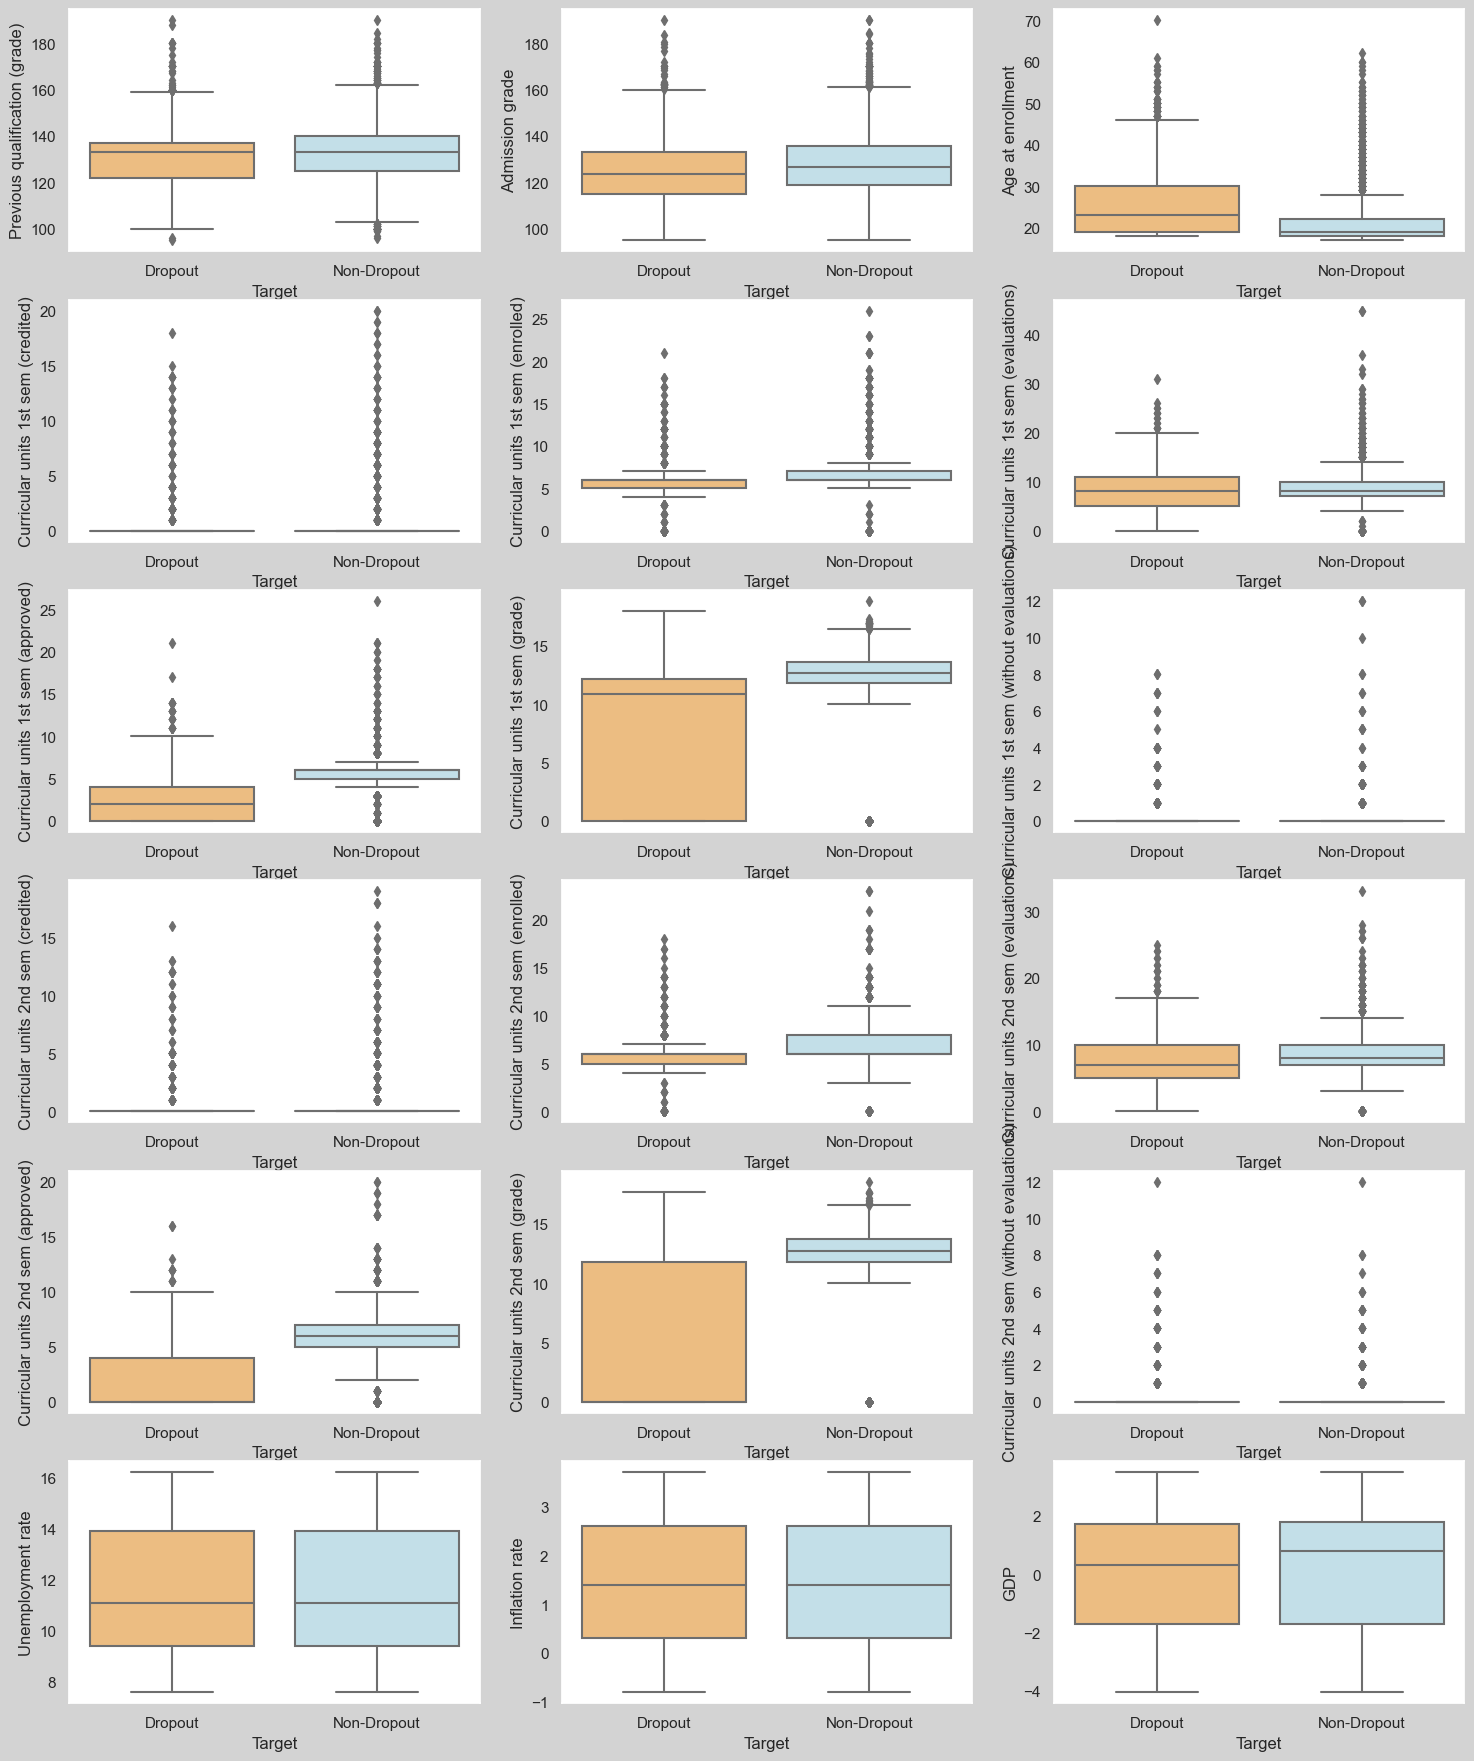

In [97]:
#Numerical features vs Target
#Boxplot

fig, ax = plt.subplots(6, 3, figsize=(18,22))
for i, subplot in zip(num_list, ax.flatten()):
    sns.boxplot(x='Target', y= i, data=df, ax=subplot, palette = 'RdYlBu')

### ASSESSING RELATIONSHIPS

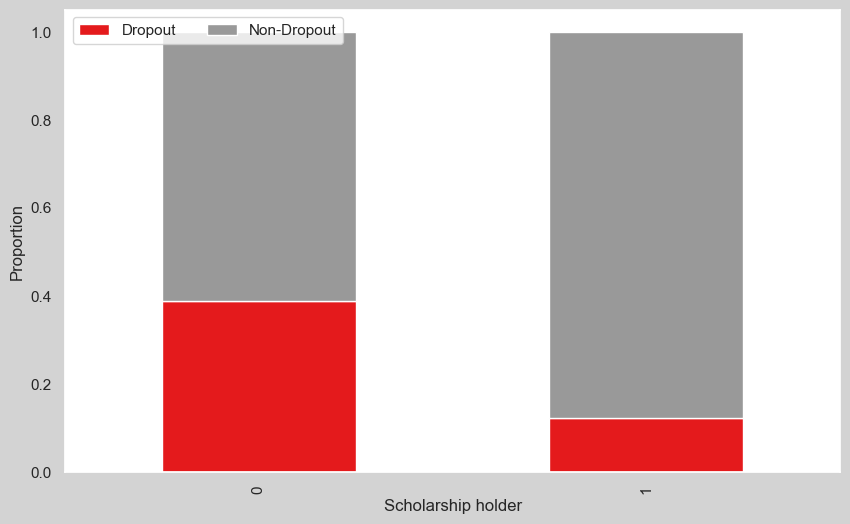

In [98]:
# college dropouts vs scholarship holders

dfstack= df[['Scholarship holder','Target']]
df_plot= pd.crosstab(index=dfstack['Scholarship holder'],
                             columns=dfstack['Target'],
                             normalize="index")
df_plot.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Scholarship holder")
plt.ylabel("Proportion")
plt.show()

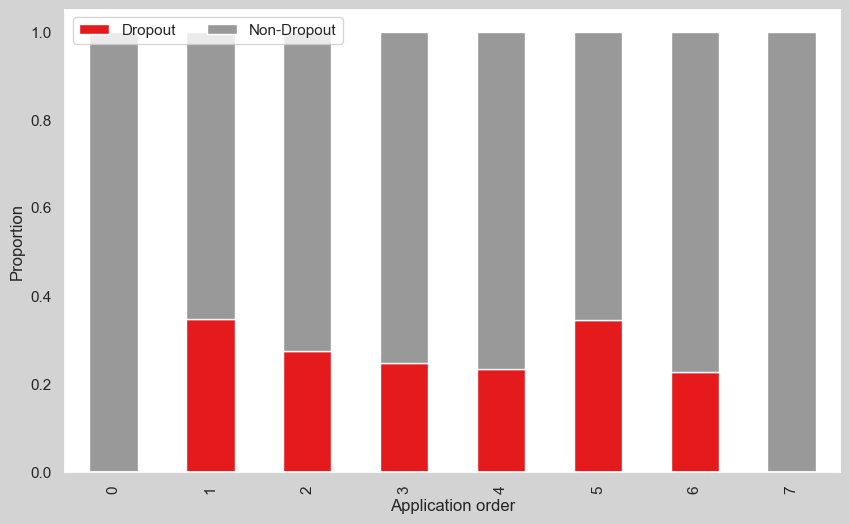

In [99]:
# college dropouts vs scholarship holders

dfstack= df[['Application order','Target']]
df_plot= pd.crosstab(index=dfstack['Application order'],
                             columns=dfstack['Target'],
                             normalize="index")
df_plot.plot(kind='bar', 
                    stacked=True, 
                    colormap='Set1', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Application order")
plt.ylabel("Proportion")
plt.show()

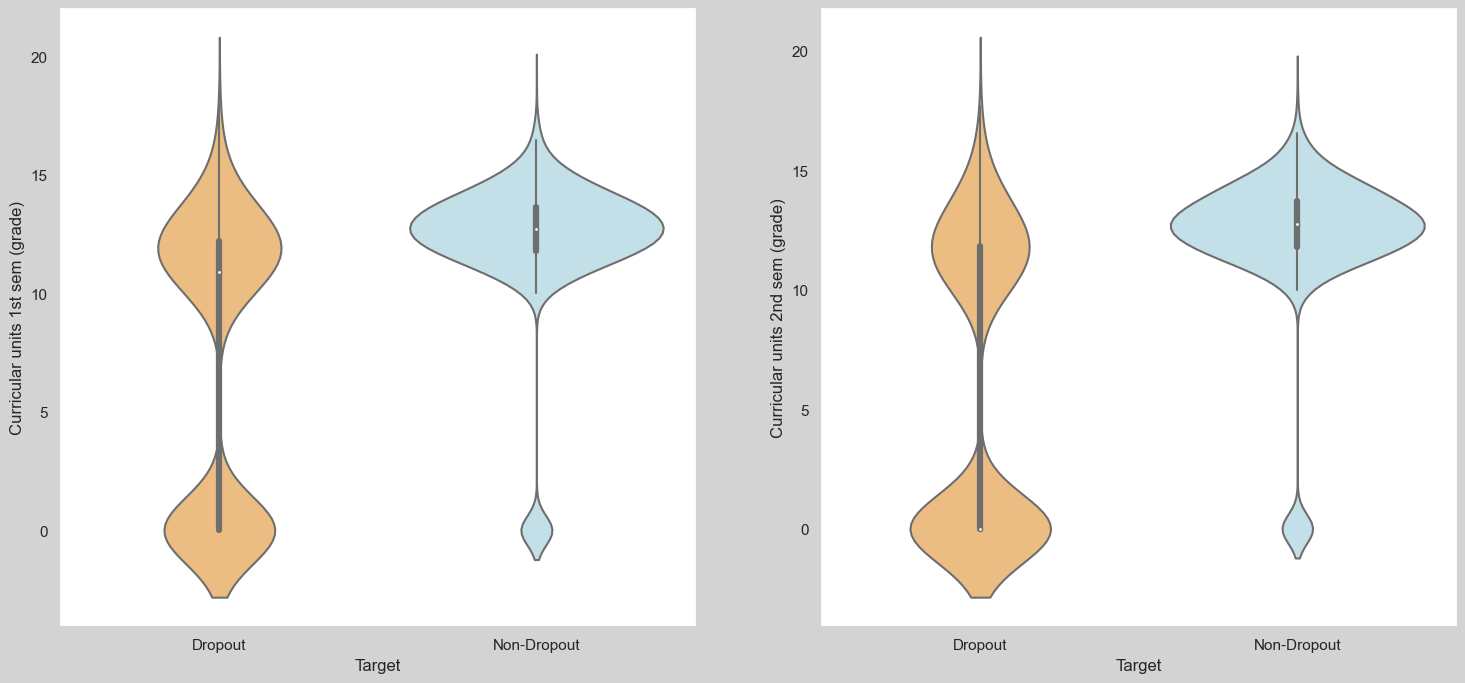

In [100]:
# grades vs dropouts
list = ['Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)']

fig, ax = plt.subplots(1, 2, figsize=(18, 8))
for i, subplot in zip(list, ax.flatten()):
    sns.violinplot(x='Target', y= i, data=df, ax=subplot, palette = 'RdYlBu')

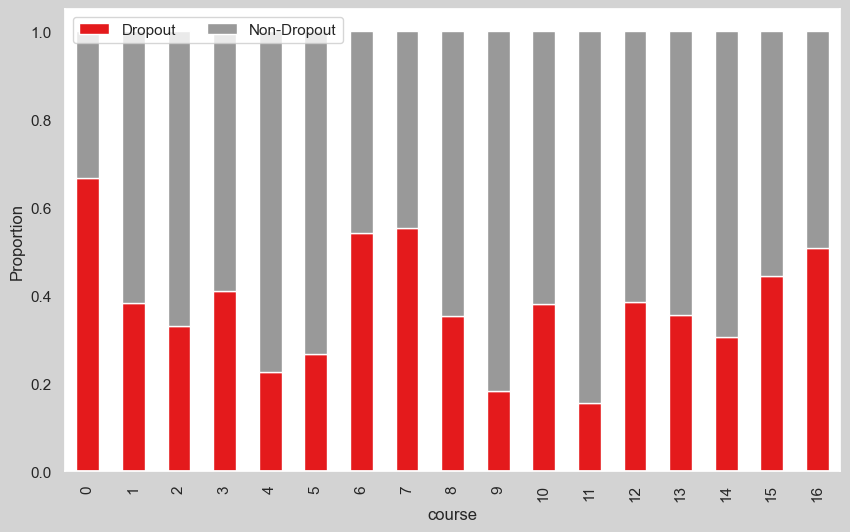

In [101]:
dfstack= df[['Course','Target']]
df_plot= pd.crosstab(index=dfstack['Course'],
                             columns=dfstack['Target'],
                             normalize="index")

palette_color = sns.color_palette('RdYlBu')
df_plot.plot(kind='bar', 
                    stacked=True, 
                    cmap='Set1', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("course")
plt.ylabel("Proportion")
plt.show()

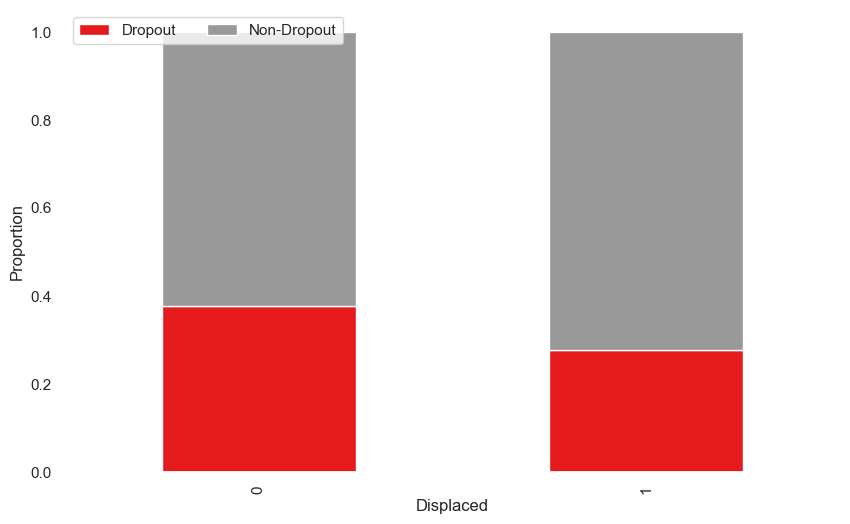

In [157]:
dfstack= df[['Displaced','Target']]
df_plot= pd.crosstab(index=dfstack['Displaced'],
                             columns=dfstack['Target'],
                             normalize="index")

palette_color = sns.color_palette('RdYlBu')
df_plot.plot(kind='bar', 
                    stacked=True, 
                    cmap='Set1', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Displaced")
plt.ylabel("Proportion")
plt.show()

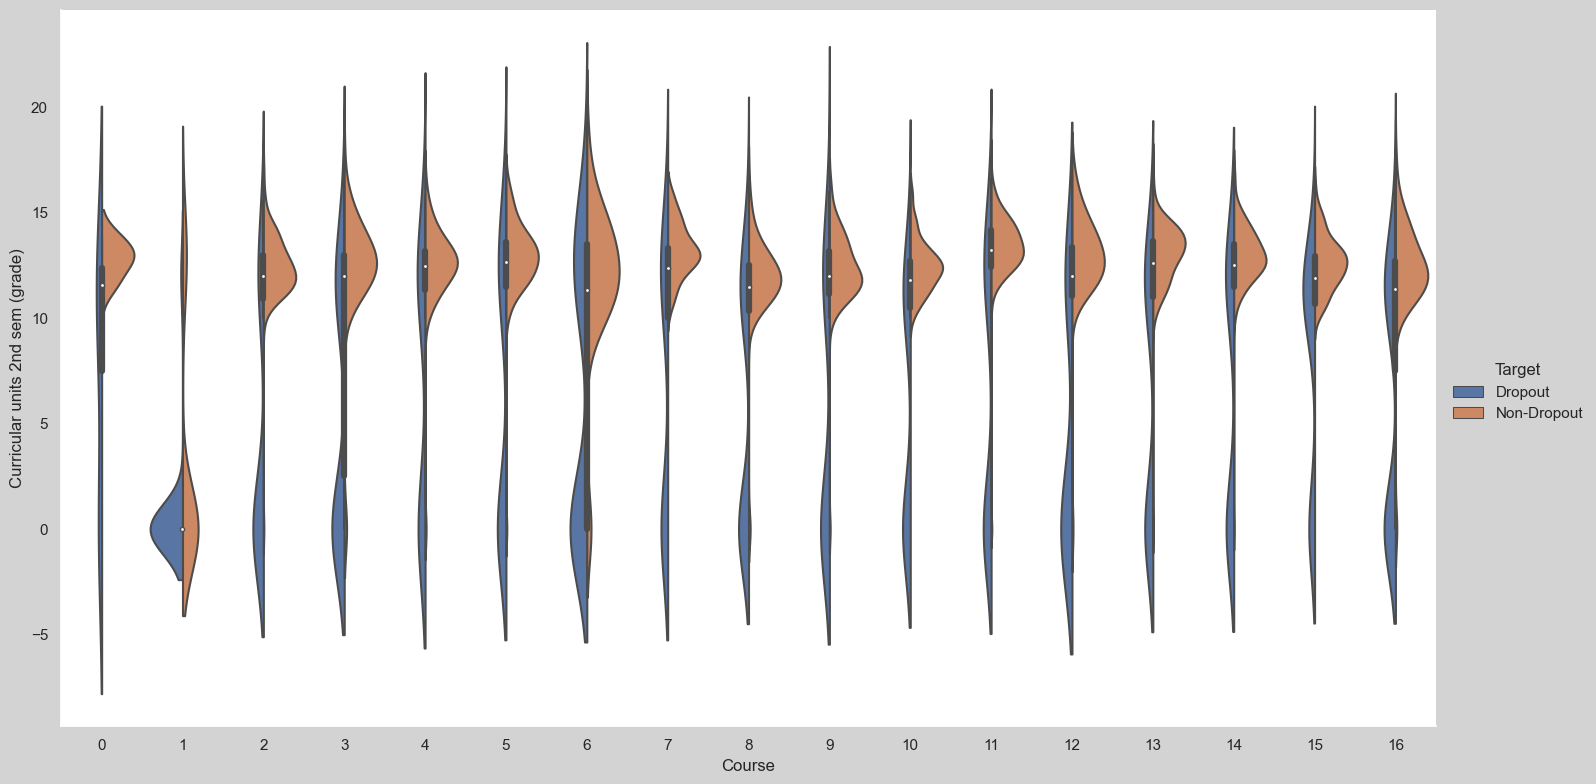

In [102]:
figsize =(20,20)
sns.catplot(
    data=df, x="Course", y='Curricular units 2nd sem (grade)', hue="Target",
    kind="violin", split=True,height=8, aspect=11/6
)

In [103]:
df['Target'].replace(['Non-Dropout','Dropout'],
                        [0, 1], inplace=True)

In [104]:
df['Target'].value_counts() #0 for non-dropouts and 1 for dropouts

0    3003
1    1421
Name: Target, dtype: int64

In [105]:
X = df.drop(['Target'], axis=1)
y = df['Target']

In [106]:
#oversampling to balance classes

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_resampled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0,7,5,1,1,0,122.0,0,12,9,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,0,5,1,10,1,0,160.0,0,0,2,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,0,0,5,4,1,0,122.0,0,21,26,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,0,7,2,14,1,0,122.0,0,22,26,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,1,11,1,2,0,0,100.0,0,21,27,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [107]:
dfrs = X_resampled.copy()
dfrs['Target'] = y_resampled

dfrs.shape

(6006, 37)

In [108]:
dfrs['Target'].value_counts()

1    3003
0    3003
Name: Target, dtype: int64

In [109]:
X_resampled.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0,7,5,1,1,0,122.0,0,12,9,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,0,5,1,10,1,0,160.0,0,0,2,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,0,0,5,4,1,0,122.0,0,21,26,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,0,7,2,14,1,0,122.0,0,22,26,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,1,11,1,2,0,0,100.0,0,21,27,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


## RECURSIVE FEATURE ELIMINATION

In [110]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=1234)

In [112]:
model = LogisticRegression() #classification model
rfe = RFE(model, n_features_to_select=20) # Takes the 20 most important features only
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [113]:
X_train.columns[(rfe.get_support())]

Index(['Marital status', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)', 'Unemployment rate'],
      dtype='object')

In [114]:
X_new = X_train[['Marital status', 'Application order', 'Course',
       'Daytime/evening attendance\t', "Father's occupation", 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)', 'Unemployment rate']]
X_testnew = X_test[['Marital status', 'Application order', 'Course',
       'Daytime/evening attendance\t',"Father's occupation", 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)', 'Unemployment rate']]
X_new.head()

,Marital status,Application order,Course,Daytime/evening attendance\t,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Unemployment rate
5821,0,4,8,1,9,1,0,0,0,0,0,34,0,0,0,0,0,5,0,9.4
4292,1,1,11,1,6,0,0,0,1,1,0,32,0,0,7,0,0,8,8,13.9
2008,0,1,1,1,7,1,0,0,1,0,0,18,0,0,0,0,0,0,0,7.6
3059,0,3,11,1,9,1,0,0,1,0,1,19,0,0,7,0,0,8,7,10.8
4058,0,1,5,1,1,1,0,0,1,0,0,19,0,1,6,0,0,6,6,15.5


## CLASSIFICATION MODELS

In [115]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [116]:
#standardising and encoding data
numerical = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (approved)', 'Unemployment rate']
categorical = ['Marital status', 'Application order', 'Course',
       'Daytime/evening attendance\t', "Father's occupation", 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International']

numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer()), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
data_transformer = ColumnTransformer(transformers=[('numerical', numerical_transformer, numerical),
                                                   ('categorical', categorical_transformer, categorical)])
               

In [117]:
# machine learning model pipeline

models = []
models.append(LogisticRegression(solver='liblinear'))
models.append(SVC())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(RandomForestClassifier())

In [118]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list =['Logistic Regression','SVM','KNN','Decision Tree','Random Forest']
acc_list = []
auc_list = []
cm_list = []
f1_list =[]
precision_list=[]
recall_list=[]


for model in models:
    pipeline = Pipeline([('data_transformer', data_transformer),('classifier', model)])
    pipeline.fit(X_new,y_train)
    y_pred = pipeline.predict(X_testnew)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr,tpr,_thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(confusion_matrix(y_test,y_pred))
    f1_list.append(metrics.f1_score(y_test,y_pred))
    precision_list.append(metrics.precision_score(y_test,y_pred))
    recall_list.append(metrics.recall_score(y_test,y_pred))

In [119]:
#accuracy and auc
result_df =pd.DataFrame({'Model':model_list, 'Accuracy':acc_list, 'Precision':precision_list, 'Recall':recall_list , 'AUC':auc_list, 'F1':f1_list})
result_df

,Model,Accuracy,Precision,Recall,AUC,F1
0,Logistic Regression,0.864847,0.867036,0.854025,0.86,0.860481
1,SVM,0.872836,0.879552,0.856753,0.87,0.868003
2,KNN,0.840213,0.851641,0.814461,0.84,0.832636
3,Decision Tree,0.890146,0.851485,0.938608,0.89,0.892927
4,Random Forest,0.930093,0.904639,0.957708,0.93,0.930417


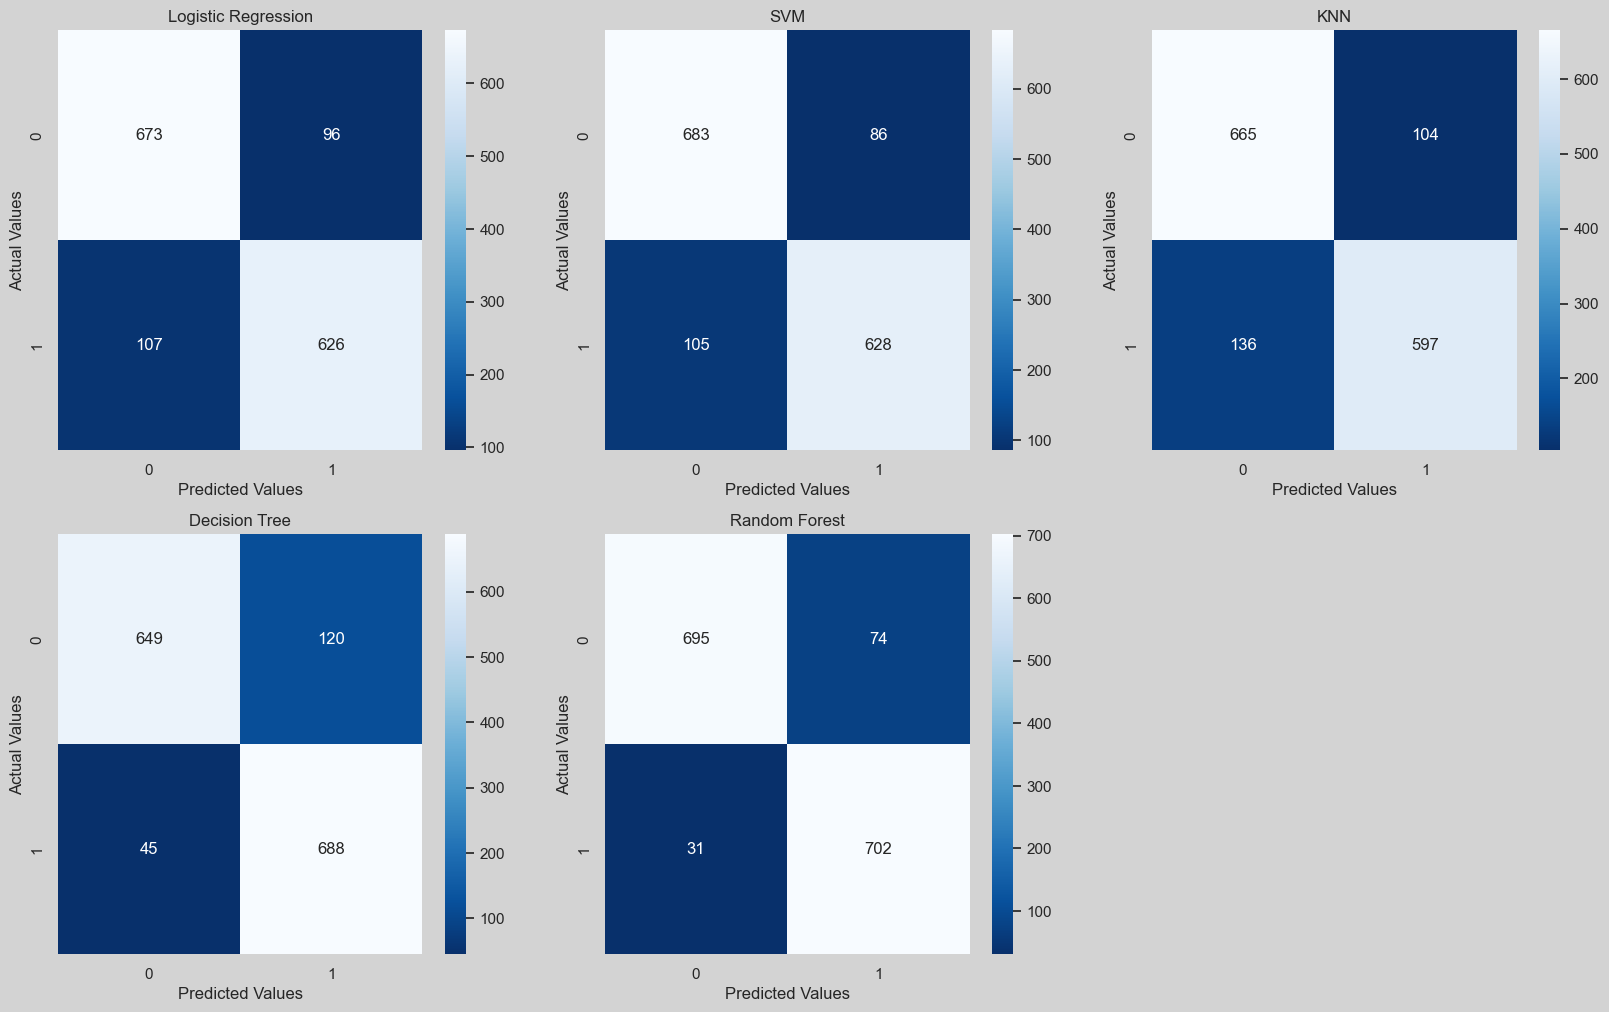

In [120]:
#confusion matrix in a heatmap
fig = plt.figure(figsize =(20,12))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
    cm_plot = sns.heatmap(cm,annot=True,cmap ='Blues_r', fmt ='g')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [121]:
# Evaluate Model
def evaluate_c(model, test_features, test_labels):
    predictions = model.predict(test_features)
    acc = (metrics.accuracy_score(test_labels,predictions))
    cm = (confusion_matrix(test_labels,predictions))
    auc = (round(metrics.auc(fpr,tpr),2))
    f1 = (metrics.f1_score(test_labels,predictions))
    precision = (metrics.precision_score(test_labels,predictions))
    recall = (metrics.recall_score(test_labels,predictions))
    print('Model Performance')
    print('Accuracy = {:0.2f}.'.format(acc))
    print('AUC = {:0.2f}.'.format(auc))
    print('F1 = {:0.2f}.'.format(f1))
    print('Precision = {:0.2f}'.format(precision))
    print('Recall = {:0.2f}.'.format(recall))

## RANDOM FOREST CLASSIFIER

In [122]:
rfc = Pipeline([('data_transformer', data_transformer),('classifier', RandomForestClassifier())])
rfc.fit(X_new, y_train)

Pipeline(steps=[('data_transformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(without evaluations)',
                                                   'Curricular units 2nd sem '
                                                  

In [123]:
evaluate_c(rfc, X_testnew, y_test)

Model Performance
Accuracy = 0.92.
AUC = 0.93.
F1 = 0.92.
Precision = 0.90
Recall = 0.95.


In [124]:
# Get numerical feature importances

importances = (rfc[1][1].feature_importances_).tolist()
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_new,importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Displaced            Importance: 0.26
Variable: Application order    Importance: 0.07
Variable: Educational special needs Importance: 0.05
Variable: Father's occupation  Importance: 0.03
Variable: Marital status       Importance: 0.01
Variable: Course               Importance: 0.01
Variable: Debtor               Importance: 0.01
Variable: Curricular units 1st sem (credited) Importance: 0.01
Variable: Curricular units 2nd sem (credited) Importance: 0.01
Variable: Daytime/evening attendance	 Importance: 0.0
Variable: Tuition fees up to date Importance: 0.0
Variable: Gender               Importance: 0.0
Variable: Scholarship holder   Importance: 0.0
Variable: Age at enrollment    Importance: 0.0
Variable: International        Importance: 0.0
Variable: Curricular units 1st sem (approved) Importance: 0.0
Variable: Curricular units 1st sem (without evaluations) Importance: 0.0
Variable: Curricular units 2nd sem (enrolled) Importance: 0.0
Variable: Curricular units 2nd sem (approved

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

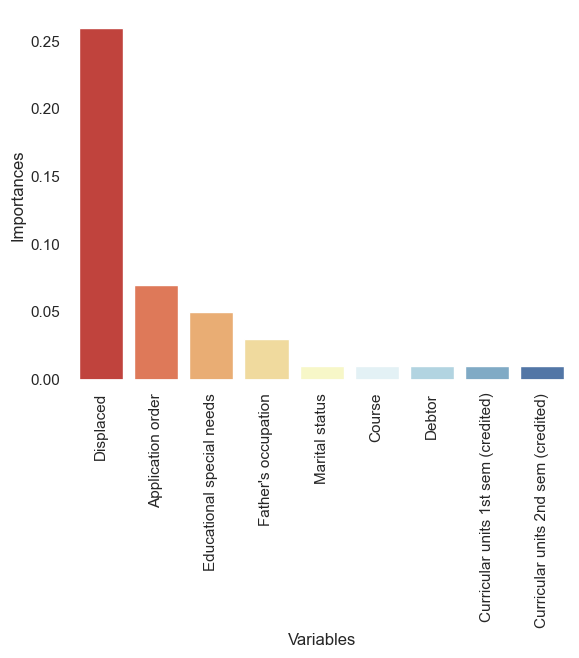

In [125]:
feature_imprf = pd.DataFrame(feature_importances, columns=('Variables', 'Importances'))
feature_imprf = feature_imprf[feature_imprf.Importances != 0]
sns.barplot(x='Variables', y='Importances', data= feature_imprf, palette = 'RdYlBu')

plt.xticks(rotation=90)
plt.yticks()

## HYPER-PARAMETER TUNING FOR RFC

In [126]:
rfc[1][1].get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold 
param_dict = {
    'n_estimators':[20,50,80,100,150,200],
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_features':['sqrt', 'log2', 'auto'],
    'min_samples_split':[20,40,60,80],
    'min_samples_leaf':[100,200,300]
}

rfc2= Pipeline([('data_transformer', data_transformer),('classifier', RandomForestClassifier())])

In [128]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=123)
gridSearch = GridSearchCV(estimator=rfc2[1],
                           param_grid =param_dict,
                           scoring='recall',
                           cv=cv,
                           n_jobs=-1,
                           verbose=10)
gridSearch.fit(X_new, y_train)
gridSearch.best_params_

Fitting 20 folds for each of 648 candidates, totalling 12960 fits


{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_leaf': 100,
 'min_samples_split': 60,
 'n_estimators': 150}

In [129]:
best_grid = gridSearch.best_estimator_
grid_accuracy = evaluate_c(best_grid, X_testnew, y_test)

Model Performance
Accuracy = 0.83.
AUC = 0.93.
F1 = 0.82.
Precision = 0.84
Recall = 0.81.


Text(92.25, 0.5, 'Actual Values')

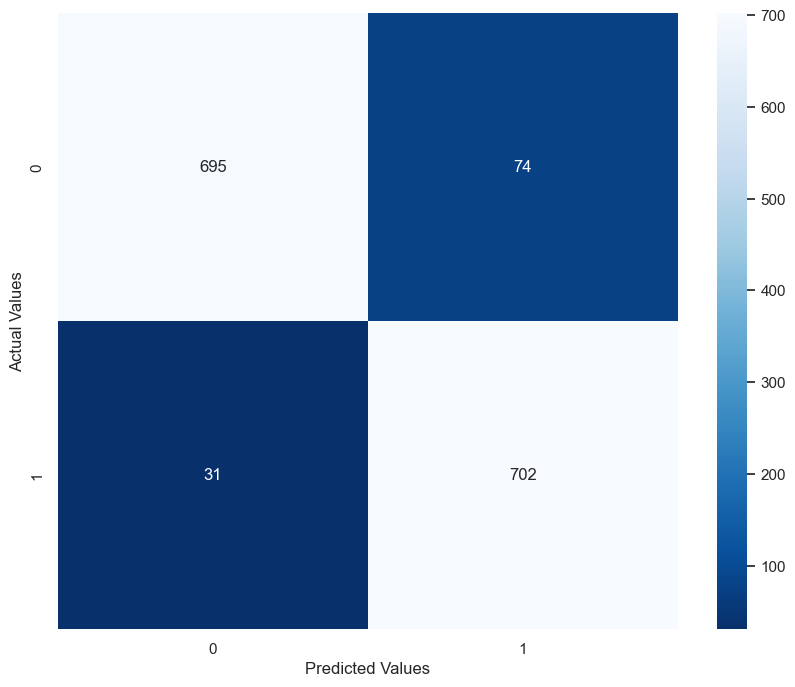

In [130]:
#confusion matrix in a heatmap
fig = plt.figure(figsize =(10,8))
cm_plot = sns.heatmap(cm,annot=True,cmap ='Blues_r', fmt ='g')
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')


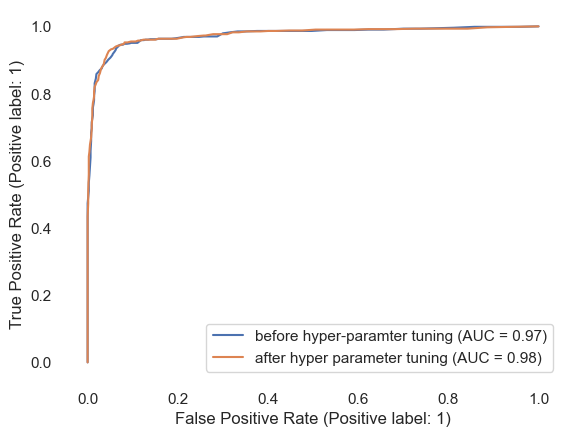

In [131]:
from sklearn.metrics import plot_roc_curve

rfc2.fit(X_new, y_train)

ax = plt.gca()
plot_roc_curve(rfc, X_testnew, y_test, ax=ax, name='before hyper-paramter tuning') 
plot_roc_curve(rfc2, X_testnew, y_test, ax=ax, name='after hyper parameter tuning')
plt.savefig('ML Curve.png')
plt.show()

In [132]:
#default model seems to be better.